# Problem statement:
i. Based on customer behaviour we try to achieve customer segmentation. This is an unsupervised learning technique therefore KMean is used to achieve customer segmentation.

ii. Making recommendation system based on country. This is achieved by using the apriori algorithm.

Dataset link: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
import copy
from operator import attrgetter
import datetime
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.colors as mcolors


Bad key "text.kerning_factor" on line 4 in
C:\Users\Swati\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#reading the file
data = pd.read_csv('C:/Users/Swati/Desktop/Downloads/archive/online_retail_II.csv', header=0) 

# 1. Cleaning and pre-processing

In [3]:
data.isnull().sum() #checking null values

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [4]:
data.shape

(1067371, 8)

In [5]:
data.dropna(inplace=True) #deleting null

In [6]:
data.shape

(824364, 8)

In [7]:
data=data.drop_duplicates(keep='first') #deleting duplicates

In [8]:
data.shape

(797885, 8)

In [9]:
data=data[~data['Invoice'].str.contains('C')] #removing the order which are cancelled

In [10]:
data.shape

(779495, 8)

In [11]:
data

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                 InvoiceDate  Price  Customer ID         Country  
0        2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1        2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2        2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3        2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4        2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                      ...    ...          ...             ...  
1067366  2011-12-09 12:50:00   2.10      12680.0          France  
1067367  2011-12-09 12:50:00   4.15      12680.0          France  
1067368  2011-12-09 12:50:00   4.15      12680.0          France  
1067369  2011-12-09 12:50:00   4.95      12680.0          France  
1067370  2011-12-09 12:50:00  18.00      12680.0          France  

[779495 rows x 8 columns]

In [12]:
#creating new column
data['Revenue']=data['Quantity'] * data['Price']

In [13]:
data

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                 InvoiceDate  Price  Customer ID         Country  Revenue  
0        2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40  
1        2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
2        2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00  
3        2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80  
4        2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00  
...                      ...    ...          ...             ...      ...  
1067366  2011-12-09 12:50:00   2.10      12680.0          France    12.60  
1067367  2011-12-09 12:50:00   4.15      12680.0          France    16.60  
1067368  2011-12-09 12:50:00   4.15      12680.0          France    16.60  
1067369  2011-12-09 12:50:00   4.95      12680.0          France    14.85  
1067370  2011-12-09 12:50:00  18.00      12680.0          France    18.00  

[779495 rows x 9 columns]

# 2. Basic Analysis

#### Overall sales trend

In [14]:
data.dtypes #checking the data types

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
Revenue        float64
dtype: object

In [15]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate']) #converting to datetime format

In [16]:
data['month_year']=data['InvoiceDate'].apply(lambda x:x.strftime('%Y-%m')) #extracting only month and year

In [17]:
data

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Revenue  \
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40   
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00   
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00   
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80   
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00   
...                     ...    ...          ...             ...      ...   
1067366 2011-12-09 12:50:00   2.10      12680.0          France    12.60   
1067367 2011-12-09 12:50:00   4.15      12680.0          France    16.60   
1067368 2011-12-09 12:50:00   4.15      12680.0          France    16.60   
1067369 2011-12-09 12:50:00   4.95      12680.0          France    14.85   
1067370 2011-12-09 12:50:00  18.00      12680.0          France    18.00   

        month_year  
0          2009-12  
1          2009-12  
2          2009-12  
3          2009-12  
4          2009-12  
...            ...  
1067366    2011-12  
1067367    2011-12  
1067368    2011-12  
1067369    2011-12  
1067370    2011-12  

[779495 rows x 10 columns]

In [18]:
data_trend=data.groupby('month_year').sum()['Revenue'].reset_index() #checking the trend

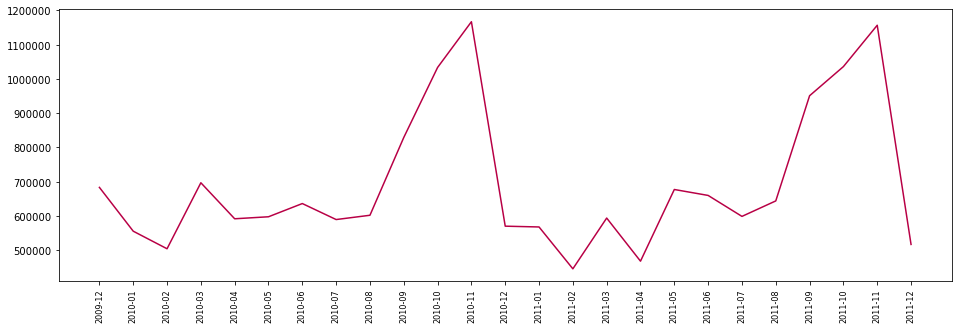

In [19]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(data_trend['month_year'], data_trend['Revenue'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

### Observation:
a.	There is a sharp increase in sales in the month of ‘November’. This could be the reason due to people buying Christmas gifts in the month of November.

b.	A sharp decrease in December could be the reason as people already bought the gifts in November.

c. There is a little uptreand in the month of March.


#### Top 10 counteries

In [20]:
data['Country'].value_counts()[:10]

United Kingdom    700434
Germany            16440
EIRE               15567
France             13512
Netherlands         5090
Spain               3663
Belgium             3056
Switzerland         3006
Portugal            2356
Australia           1792
Name: Country, dtype: int64

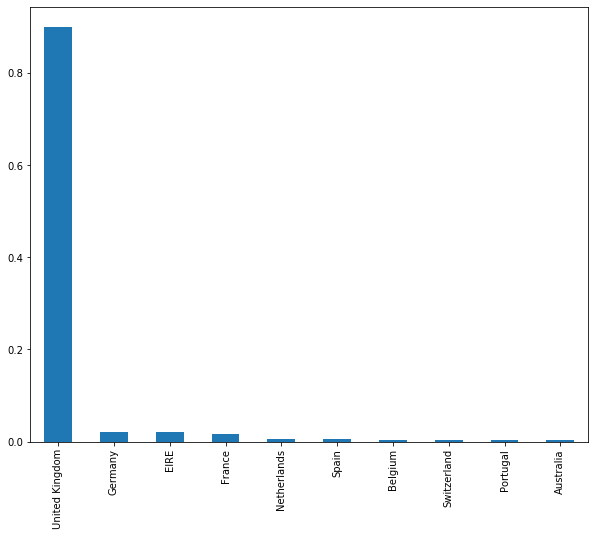

In [21]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 8))
plt.figure(figsize=(10,8))
data['Country'].value_counts(normalize=True)[:10].plot(kind='bar')

#### Top 10 product by revenue

In [22]:
sell_prod=pd.DataFrame(data.groupby('Description').sum()['Revenue'])
sell_prod.sort_values(by=['Revenue'],inplace=True,ascending=False)
sell_prod[:10]

Revenue
Description                                  
REGENCY CAKESTAND 3 TIER            277656.25
WHITE HANGING HEART T-LIGHT HOLDER  247048.01
PAPER CRAFT , LITTLE BIRDIE         168469.60
Manual                              151777.67
JUMBO BAG RED RETROSPOT             134307.44
POSTAGE                             124648.04
ASSORTED COLOUR BIRD ORNAMENT       124351.86
PARTY BUNTING                       103283.38
MEDIUM CERAMIC TOP STORAGE JAR       81416.73
PAPER CHAIN KIT 50'S CHRISTMAS       76598.18

#### Top 10 most selling products

In [23]:
best_sell_product=pd.DataFrame(data.groupby('Description').sum()['Quantity'])
best_sell_product.sort_values(by=['Quantity'],inplace=True,ascending=False)
best_sell_product[:10]

Quantity
Description                                 
WORLD WAR 2 GLIDERS ASSTD DESIGNS     105185
WHITE HANGING HEART T-LIGHT HOLDER     91757
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          78234
MEDIUM CERAMIC TOP STORAGE JAR         77916
JUMBO BAG RED RETROSPOT                74224
BROCADE RING PURSE                     70082
PACK OF 60 PINK PAISLEY CAKE CASES     54592
60 TEATIME FAIRY CAKE CASES            52828
PACK OF 72 RETRO SPOT CAKE CASES       45129

In [24]:
country_top5_dict=(data['Country'].value_counts()[:5]).to_dict() #getting top countries

In [25]:
country_top5_dict

{'United Kingdom': 700434,
 'Germany': 16440,
 'EIRE': 15567,
 'France': 13512,
 'Netherlands': 5090}

In [26]:
country_top5_list=[]
for i in country_top5_dict.keys():
    country_top5_list.append(i)

In [27]:
country_top5_list

['United Kingdom', 'Germany', 'EIRE', 'France', 'Netherlands']

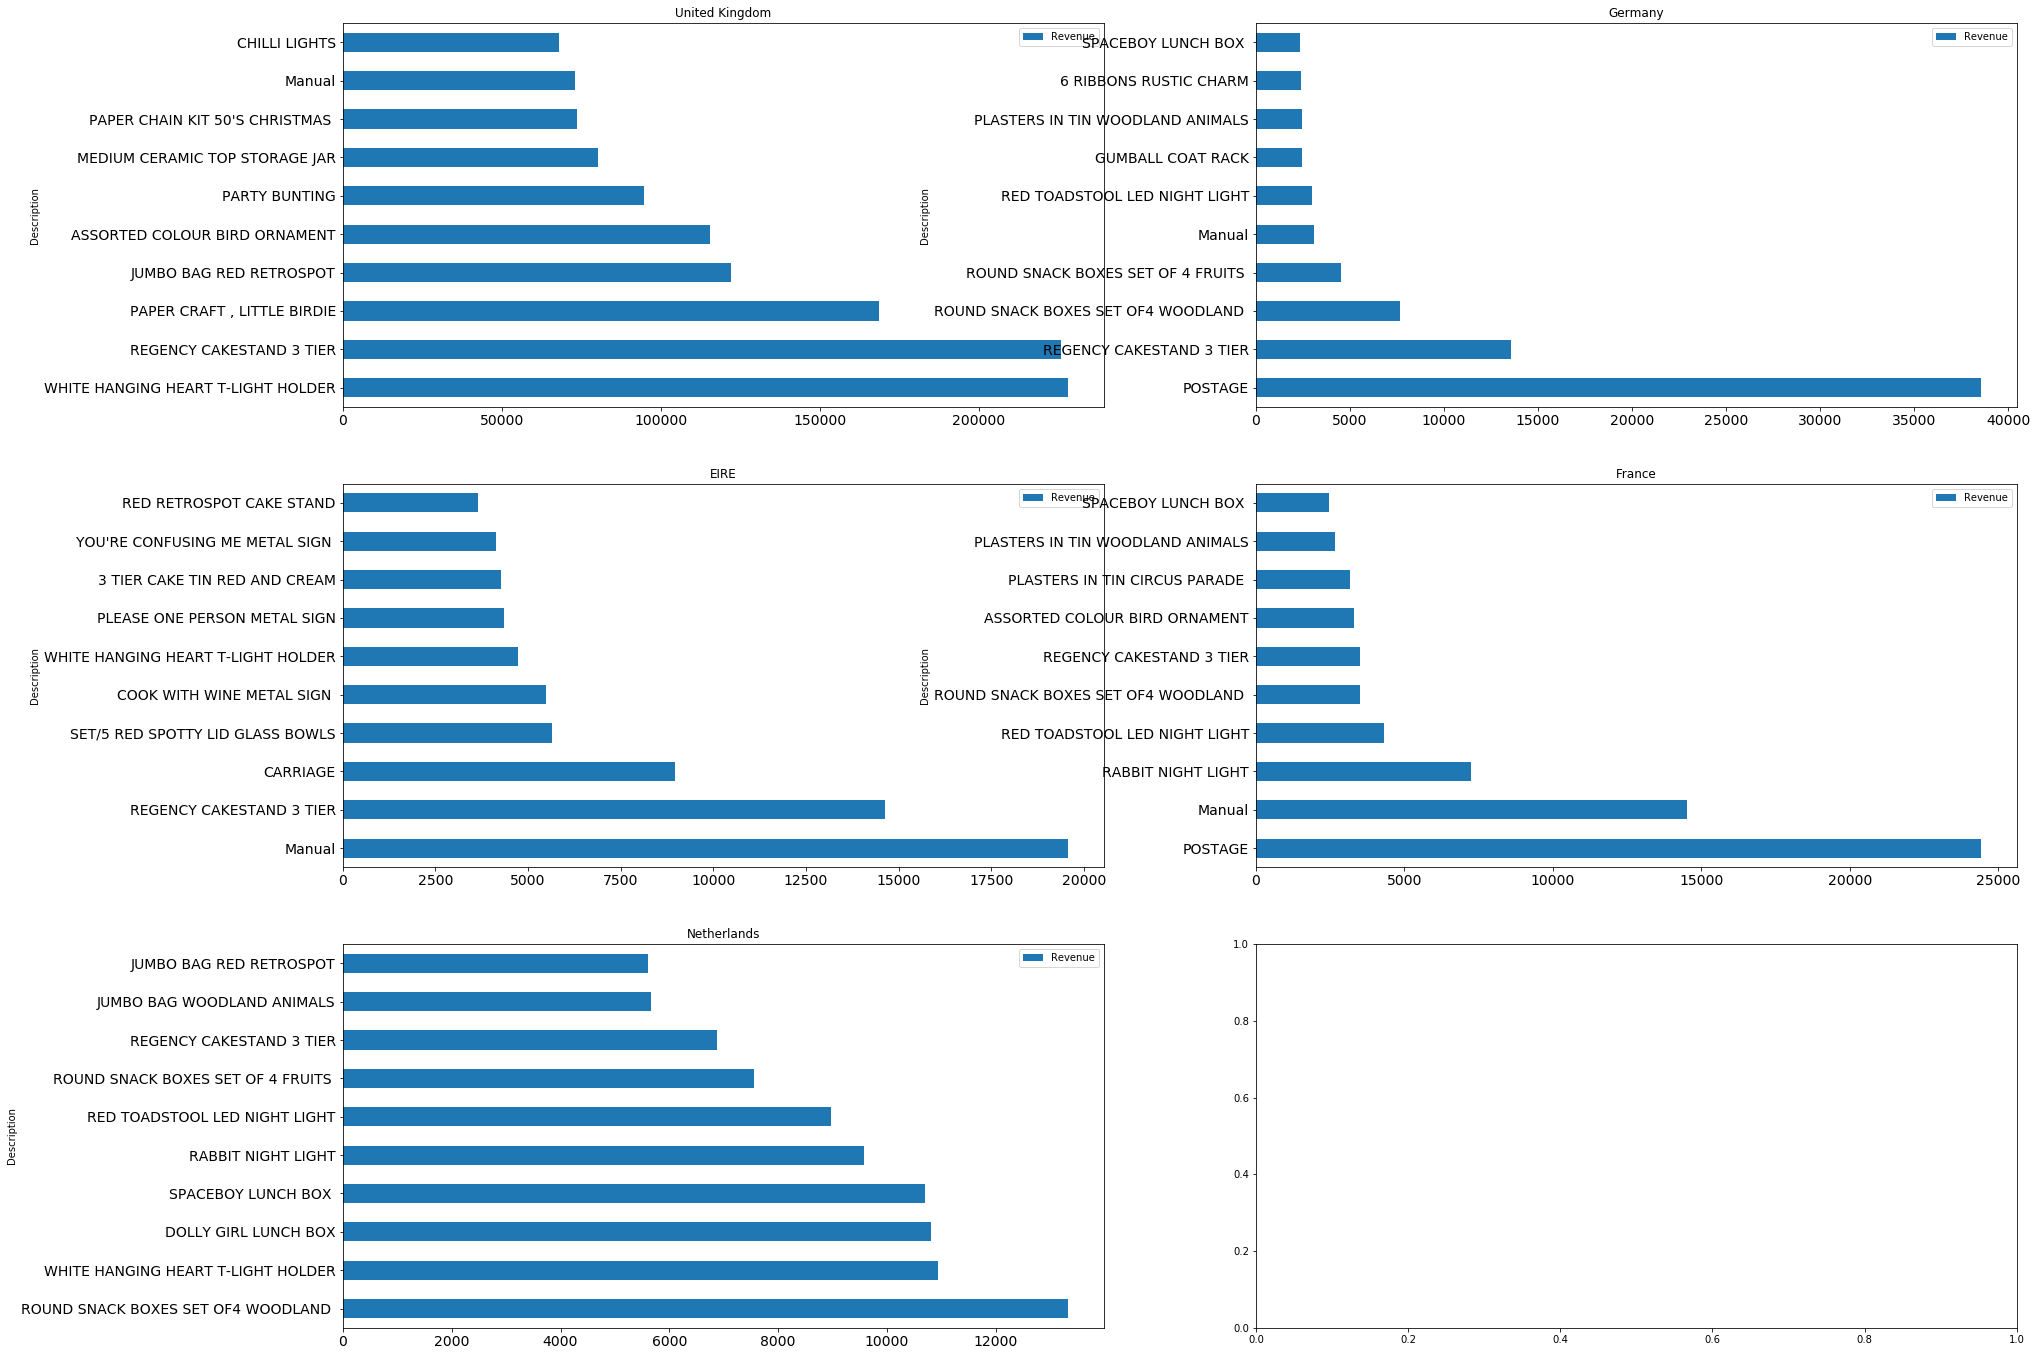

In [28]:
# Top ten selling product based on top 5 countries
fig, axes = plt.subplots(3,2, figsize=(30, 24))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(country_top5_list):
    country_data=data[data['Country']==c]
    sell_prod_country_top5=pd.DataFrame(country_data.groupby('Description').sum()['Revenue'])
    sell_prod_country_top5.sort_values(by=['Revenue'],inplace=True,ascending=False)
    _ = sell_prod_country_top5[:10].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)

In [29]:
data['Country'].value_counts(normalize=True)[:10]

United Kingdom    0.898574
Germany           0.021091
EIRE              0.019971
France            0.017334
Netherlands       0.006530
Spain             0.004699
Belgium           0.003920
Switzerland       0.003856
Portugal          0.003022
Australia         0.002299
Name: Country, dtype: float64

#### Checking top spenders are from which country

In [30]:
cust_revenue=pd.DataFrame(data.groupby('Customer ID').sum()['Revenue'])
cust_revenue.sort_values(by=['Revenue'],inplace=True,ascending=False)

In [31]:
cust_revenue.reset_index(inplace=True)

In [32]:
cust_revenue

Customer ID    Revenue
0         18102.0  580987.04
1         14646.0  528602.52
2         14156.0  313437.62
3         14911.0  291420.81
4         17450.0  244784.25
...           ...        ...
5876      16738.0       3.75
5877      14095.0       2.95
5878      14827.0       0.00
5879      14103.0       0.00
5880      13256.0       0.00

[5881 rows x 2 columns]

In [33]:
cust_revenue.columns

Index(['Customer ID', 'Revenue'], dtype='object')

In [34]:
cust_revenue['Customer ID'][:10] #just top 10

0    18102.0
1    14646.0
2    14156.0
3    14911.0
4    17450.0
5    13694.0
6    17511.0
7    16446.0
8    16684.0
9    12415.0
Name: Customer ID, dtype: float64

In [35]:
top_cust_id=cust_revenue['Customer ID'][:10].tolist()

In [36]:
top_cust_id

[18102.0,
 14646.0,
 14156.0,
 14911.0,
 17450.0,
 13694.0,
 17511.0,
 16446.0,
 16684.0,
 12415.0]

In [37]:
top_cust_country=[]
for i in top_cust_id:
    top_cust_country.extend((data[data['Customer ID']==i]['Country'][:1]).to_list())

In [38]:
top_cust_country

['United Kingdom',
 'Netherlands',
 'EIRE',
 'EIRE',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'Australia']

In [39]:
top_cust_dict={}
for i,j in zip(top_cust_id,top_cust_country):
    top_cust_dict[i]=j

In [40]:
top_cust_dict

{18102.0: 'United Kingdom',
 14646.0: 'Netherlands',
 14156.0: 'EIRE',
 14911.0: 'EIRE',
 17450.0: 'United Kingdom',
 13694.0: 'United Kingdom',
 17511.0: 'United Kingdom',
 16446.0: 'United Kingdom',
 16684.0: 'United Kingdom',
 12415.0: 'Australia'}

#### We have top spenders from other countries too other than UK.


In [41]:
data[data['StockCode'].str.contains('TEST')] #Some test product were free of cost for two customers

Invoice StockCode              Description  Quantity  \
27994   491725   TEST001  This is a test product.        10   
28251   491742   TEST001  This is a test product.         5   
28254   491744   TEST001  This is a test product.         5   
39398   492718   TEST001  This is a test product.         5   
39411   492722   TEST002  This is a test product.         1   
45228   493410   TEST001  This is a test product.         5   
45230   493412   TEST001  This is a test product.         5   
56117   494450   TEST001  This is a test product.         5   
66084   495295   TEST001  This is a test product.         5   
89084   497819   TEST001  This is a test product.         5   
89180   497843   TEST001  This is a test product.         5   
156017  504188   TEST001  This is a test product.         5   

               InvoiceDate  Price  Customer ID         Country  Revenue  \
27994  2009-12-14 08:34:00    4.5      12346.0  United Kingdom     45.0   
28251  2009-12-14 11:00:00    4.5      12346.0  United Kingdom     22.5   
28254  2009-12-14 11:02:00    4.5      12346.0  United Kingdom     22.5   
39398  2009-12-18 10:47:00    4.5      12346.0  United Kingdom     22.5   
39411  2009-12-18 10:55:00    1.0      12346.0  United Kingdom      1.0   
45228  2010-01-04 09:24:00    4.5      12346.0  United Kingdom     22.5   
45230  2010-01-04 09:53:00    4.5      12346.0  United Kingdom     22.5   
56117  2010-01-14 13:50:00    4.5      12346.0  United Kingdom     22.5   
66084  2010-01-22 13:30:00    4.5      12346.0  United Kingdom     22.5   
89084  2010-02-12 14:58:00    0.0      14103.0  United Kingdom      0.0   
89180  2010-02-12 15:47:00    0.0      14827.0  United Kingdom      0.0   
156017 2010-04-12 09:52:00    4.5      16454.0  United Kingdom     22.5   

       month_year  
27994     2009-12  
28251     2009-12  
28254     2009-12  
39398     2009-12  
39411     2009-12  
45228     2010-01  
45230     2010-01  
56117     2010-01  
66084     2010-01  
89084     2010-02  
89180     2010-02  
156017    2010-04

In [42]:
data.shape

(779495, 10)

In [43]:
df=copy.deepcopy(data)

In [44]:
df.groupby(['Customer ID']).nunique()

Invoice  StockCode  Description  Quantity  InvoiceDate  Price  \
Customer ID                                                                  
12346.0           12         27           26         4           12      6   
12347.0            8        126          126        16            8     33   
12348.0            5         25           28        11            5      8   
12349.0            4        138          145        14            4     47   
12350.0            1         17           17         5            1      7   
...              ...        ...          ...       ...          ...    ...   
18283.0           22        352          372        10           22     37   
18284.0            1         28           28        10            1     10   
18285.0            1         12           12         6            1     12   
18286.0            2         67           67        12            2     23   
18287.0            7        120          120        16            7     27   

             Country  Revenue  month_year  
Customer ID                                
12346.0            1        7           5  
12347.0            1       60           8  
12348.0            1       20           5  
12349.0            1       64           4  
12350.0            1        9           1  
...              ...      ...         ...  
18283.0            1       89          14  
18284.0            1       16           1  
18285.0            1       12           1  
18286.0            1       35           2  
18287.0            1       55           5  

[5881 rows x 9 columns]

In [45]:
df.groupby(['Customer ID'])['Invoice'].nunique()

Customer ID
12346.0    12
12347.0     8
12348.0     5
12349.0     4
12350.0     1
           ..
18283.0    22
18284.0     1
18285.0     1
18286.0     2
18287.0     7
Name: Invoice, Length: 5881, dtype: int64

In [46]:
n_orders = df.groupby(['Customer ID'])['Invoice'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['Customer ID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

72.35% of customers ordered more than once.


## Observation:

i.	There is a total of 5881 unique customers in our dataset.

ii.	72.35% of customers have ordered more than once. 

iii.The top three countries which purchased the most are the United Kingdom, Germany, and EIRE.

iv.	The top three products which gives the maximum revenue are ‘REGENCY CAKESTAND 3 TIER’,  ‘WHITE HANGING HEART T-LIGHT HOLDER’, ‘PAPER CRAFT , LITTLE BIRDIE’

v.	The top three product which are sold the most are ‘WORLD WAR 2 GLIDERS ASSTD DESIGNS’, ‘WHITE HANGING HEART T-LIGHT HOLDER’, ‘PAPER CRAFT, LITTLE BIRDIE’.

vi.	More than 80% purchased are done from the United Kingdom still top three customers which spent the most are from the United Kingdom, Netherlands and EIRE.

# 3.Cohort Analysis

It is a part of behavioural analytics that examines data from the large set into related groups before analysis.

### 3.1 Customer retention

In [47]:
df = df[['Customer ID', 'Invoice', 'InvoiceDate']].drop_duplicates()

In [48]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [49]:
df.shape

(37039, 3)

In [50]:
df

Customer ID Invoice         InvoiceDate
0            13085.0  489434 2009-12-01 07:45:00
8            13085.0  489435 2009-12-01 07:46:00
12           13078.0  489436 2009-12-01 09:06:00
31           15362.0  489437 2009-12-01 09:08:00
54           18102.0  489438 2009-12-01 09:24:00
...              ...     ...                 ...
1067326      13777.0  581583 2011-12-09 12:23:00
1067328      13777.0  581584 2011-12-09 12:25:00
1067330      15804.0  581585 2011-12-09 12:31:00
1067351      13113.0  581586 2011-12-09 12:49:00
1067355      12680.0  581587 2011-12-09 12:50:00

[37039 rows x 3 columns]

i.	New column named ‘cohort’ which takes the minimum InvoiceDate of each customer. Since we are not provided with the first date when a customer visited the website I’m assuming the first day of the transaction as the first day visit to the website.

ii.	‘order_month’ is the column where only month and year from InvoiceDate is extracted.


In [51]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('M') 

In [52]:
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('Customer ID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [53]:
df_cohort

cohort order_month  n_customers  period_number
0    2009-12     2009-12          955              0
1    2009-12     2010-01          337              1
2    2009-12     2010-02          319              2
3    2009-12     2010-03          406              3
4    2009-12     2010-04          363              4
..       ...         ...          ...            ...
320  2011-10     2011-11           71              1
321  2011-10     2011-12           35              2
322  2011-11     2011-11          192              0
323  2011-11     2011-12           27              1
324  2011-12     2011-12           28              0

[325 rows x 4 columns]

In [54]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [55]:
cohort_pivot

period_number     0      1      2      3      4      5      6      7      8   \
cohort                                                                         
2009-12        955.0  337.0  319.0  406.0  363.0  343.0  360.0  327.0  321.0   
2010-01        383.0   79.0  119.0  117.0  101.0  115.0   99.0   88.0  107.0   
2010-02        376.0   89.0   84.0  109.0   92.0   75.0   72.0  107.0   95.0   
2010-03        443.0   84.0  102.0  107.0  103.0   90.0  109.0  134.0  122.0   
2010-04        294.0   57.0   57.0   48.0   54.0   66.0   81.0   77.0   31.0   
2010-05        254.0   40.0   43.0   44.0   45.0   65.0   54.0   32.0   15.0   
2010-06        270.0   47.0   51.0   55.0   62.0   77.0   34.0   24.0   22.0   
2010-07        186.0   29.0   34.0   55.0   54.0   26.0   21.0   27.0   27.0   
2010-08        162.0   33.0   48.0   52.0   28.0   19.0   16.0   20.0   22.0   
2010-09        243.0   55.0   57.0   30.0   22.0   25.0   33.0   24.0   31.0   
2010-10        377.0   97.0   55.0   47.0   33.0   31.0   49.0   52.0   40.0   
2010-11        325.0   57.0   30.0   31.0   25.0   28.0   42.0   32.0   28.0   
2010-12         76.0    7.0    4.0    7.0    9.0    5.0    4.0    7.0    4.0   
2011-01         71.0   12.0   15.0   14.0   15.0   11.0   11.0    9.0    8.0   
2011-02        124.0   20.0   19.0   23.0   27.0   19.0   19.0   18.0   18.0   
2011-03        179.0   33.0   39.0   36.0   40.0   27.0   37.0   36.0   43.0   
2011-04        106.0   27.0   21.0   21.0   19.0   25.0   19.0   27.0   12.0   
2011-05        111.0   26.0   27.0   18.0   24.0   23.0   29.0   13.0    NaN   
2011-06        108.0   25.0   23.0   29.0   22.0   31.0    9.0    NaN    NaN   
2011-07        102.0   22.0   31.0   28.0   35.0   16.0    NaN    NaN    NaN   
2011-08        106.0   29.0   33.0   28.0   18.0    NaN    NaN    NaN    NaN   
2011-09        189.0   51.0   71.0   28.0    NaN    NaN    NaN    NaN    NaN   
2011-10        221.0   71.0   35.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11        192.0   27.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12         28.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

period_number     9   ...     15     16     17     18     19     20     21  \
cohort                ...                                                    
2009-12        346.0  ...  289.0  251.0  289.0  270.0  248.0  244.0  301.0   
2010-01        122.0  ...   58.0   90.0   76.0   71.0   75.0   93.0   74.0   
2010-02        103.0  ...   75.0   60.0   61.0   54.0   86.0   86.0   61.0   
2010-03         48.0  ...   75.0   77.0   69.0   78.0   89.0   94.0   35.0   
2010-04         32.0  ...   46.0   41.0   44.0   53.0   66.0   17.0    NaN   
2010-05         21.0  ...   32.0   35.0   42.0   39.0   12.0    NaN    NaN   
2010-06         32.0  ...   33.0   36.0   55.0   14.0    NaN    NaN    NaN   
2010-07         21.0  ...   32.0   44.0   15.0    NaN    NaN    NaN    NaN   
2010-08         21.0  ...   32.0   11.0    NaN    NaN    NaN    NaN    NaN   
2010-09         32.0  ...   13.0    NaN    NaN    NaN    NaN    NaN    NaN   
2010-10         35.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-11         29.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-12          2.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-01         15.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-02         22.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-03         17.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-04          NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-05          NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-06          NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-07          NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-08          NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-09          NaN  ...    NaN    NaN    Na

In [56]:
#first column data
cohort_size = cohort_pivot.iloc[:,0]

# To get the retention matrix we divide the whole column with its first column respectively.
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0) 

In [58]:
retention_matrix

period_number   0         1         2         3         4         5   \
cohort                                                                 
2009-12        1.0  0.352880  0.334031  0.425131  0.380105  0.359162   
2010-01        1.0  0.206266  0.310705  0.305483  0.263708  0.300261   
2010-02        1.0  0.236702  0.223404  0.289894  0.244681  0.199468   
2010-03        1.0  0.189616  0.230248  0.241535  0.232506  0.203160   
2010-04        1.0  0.193878  0.193878  0.163265  0.183673  0.224490   
2010-05        1.0  0.157480  0.169291  0.173228  0.177165  0.255906   
2010-06        1.0  0.174074  0.188889  0.203704  0.229630  0.285185   
2010-07        1.0  0.155914  0.182796  0.295699  0.290323  0.139785   
2010-08        1.0  0.203704  0.296296  0.320988  0.172840  0.117284   
2010-09        1.0  0.226337  0.234568  0.123457  0.090535  0.102881   
2010-10        1.0  0.257294  0.145889  0.124668  0.087533  0.082228   
2010-11        1.0  0.175385  0.092308  0.095385  0.076923  0.086154   
2010-12        1.0  0.092105  0.052632  0.092105  0.118421  0.065789   
2011-01        1.0  0.169014  0.211268  0.197183  0.211268  0.154930   
2011-02        1.0  0.161290  0.153226  0.185484  0.217742  0.153226   
2011-03        1.0  0.184358  0.217877  0.201117  0.223464  0.150838   
2011-04        1.0  0.254717  0.198113  0.198113  0.179245  0.235849   
2011-05        1.0  0.234234  0.243243  0.162162  0.216216  0.207207   
2011-06        1.0  0.231481  0.212963  0.268519  0.203704  0.287037   
2011-07        1.0  0.215686  0.303922  0.274510  0.343137  0.156863   
2011-08        1.0  0.273585  0.311321  0.264151  0.169811       NaN   
2011-09        1.0  0.269841  0.375661  0.148148       NaN       NaN   
2011-10        1.0  0.321267  0.158371       NaN       NaN       NaN   
2011-11        1.0  0.140625       NaN       NaN       NaN       NaN   
2011-12        1.0       NaN       NaN       NaN       NaN       NaN   

period_number        6         7         8         9   ...        15  \
cohort                                                 ...             
2009-12        0.376963  0.342408  0.336126  0.362304  ...  0.302618   
2010-01        0.258486  0.229765  0.279373  0.318538  ...  0.151436   
2010-02        0.191489  0.284574  0.252660  0.273936  ...  0.199468   
2010-03        0.246050  0.302483  0.275395  0.108352  ...  0.169300   
2010-04        0.275510  0.261905  0.105442  0.108844  ...  0.156463   
2010-05        0.212598  0.125984  0.059055  0.082677  ...  0.125984   
2010-06        0.125926  0.088889  0.081481  0.118519  ...  0.122222   
2010-07        0.112903  0.145161  0.145161  0.112903  ...  0.172043   
2010-08        0.098765  0.123457  0.135802  0.129630  ...  0.197531   
2010-09        0.135802  0.098765  0.127572  0.131687  ...  0.053498   
2010-10        0.129973  0.137931  0.106101  0.092838  ...       NaN   
2010-11        0.129231  0.098462  0.086154  0.089231  ...       NaN   
2010-12        0.052632  0.092105  0.052632  0.026316  ...       NaN   
2011-01        0.154930  0.126761  0.112676  0.211268  ...       NaN   
2011-02        0.153226  0.145161  0.145161  0.177419  ...       NaN   
2011-03        0.206704  0.201117  0.240223  0.094972  ...       NaN   
2011-04        0.179245  0.254717  0.113208       NaN  ...       NaN   
2011-05        0.261261  0.117117       NaN       NaN  ...       NaN   
2011-06        0.083333       NaN       NaN       NaN  ...       NaN   
2011-07             NaN       NaN       NaN       NaN  ...       NaN   
2011-08             NaN       NaN       NaN       NaN  ...       NaN   
2011-09             NaN       NaN       NaN       NaN  ...       NaN   
2011-10             NaN       NaN       NaN       NaN  ...       NaN   
2011-11             NaN       NaN       NaN       NaN  ...       NaN   
2011-12             NaN       NaN       NaN       NaN  ...       NaN   

period_number        16        17        18        19        20        21  \
cohort                           

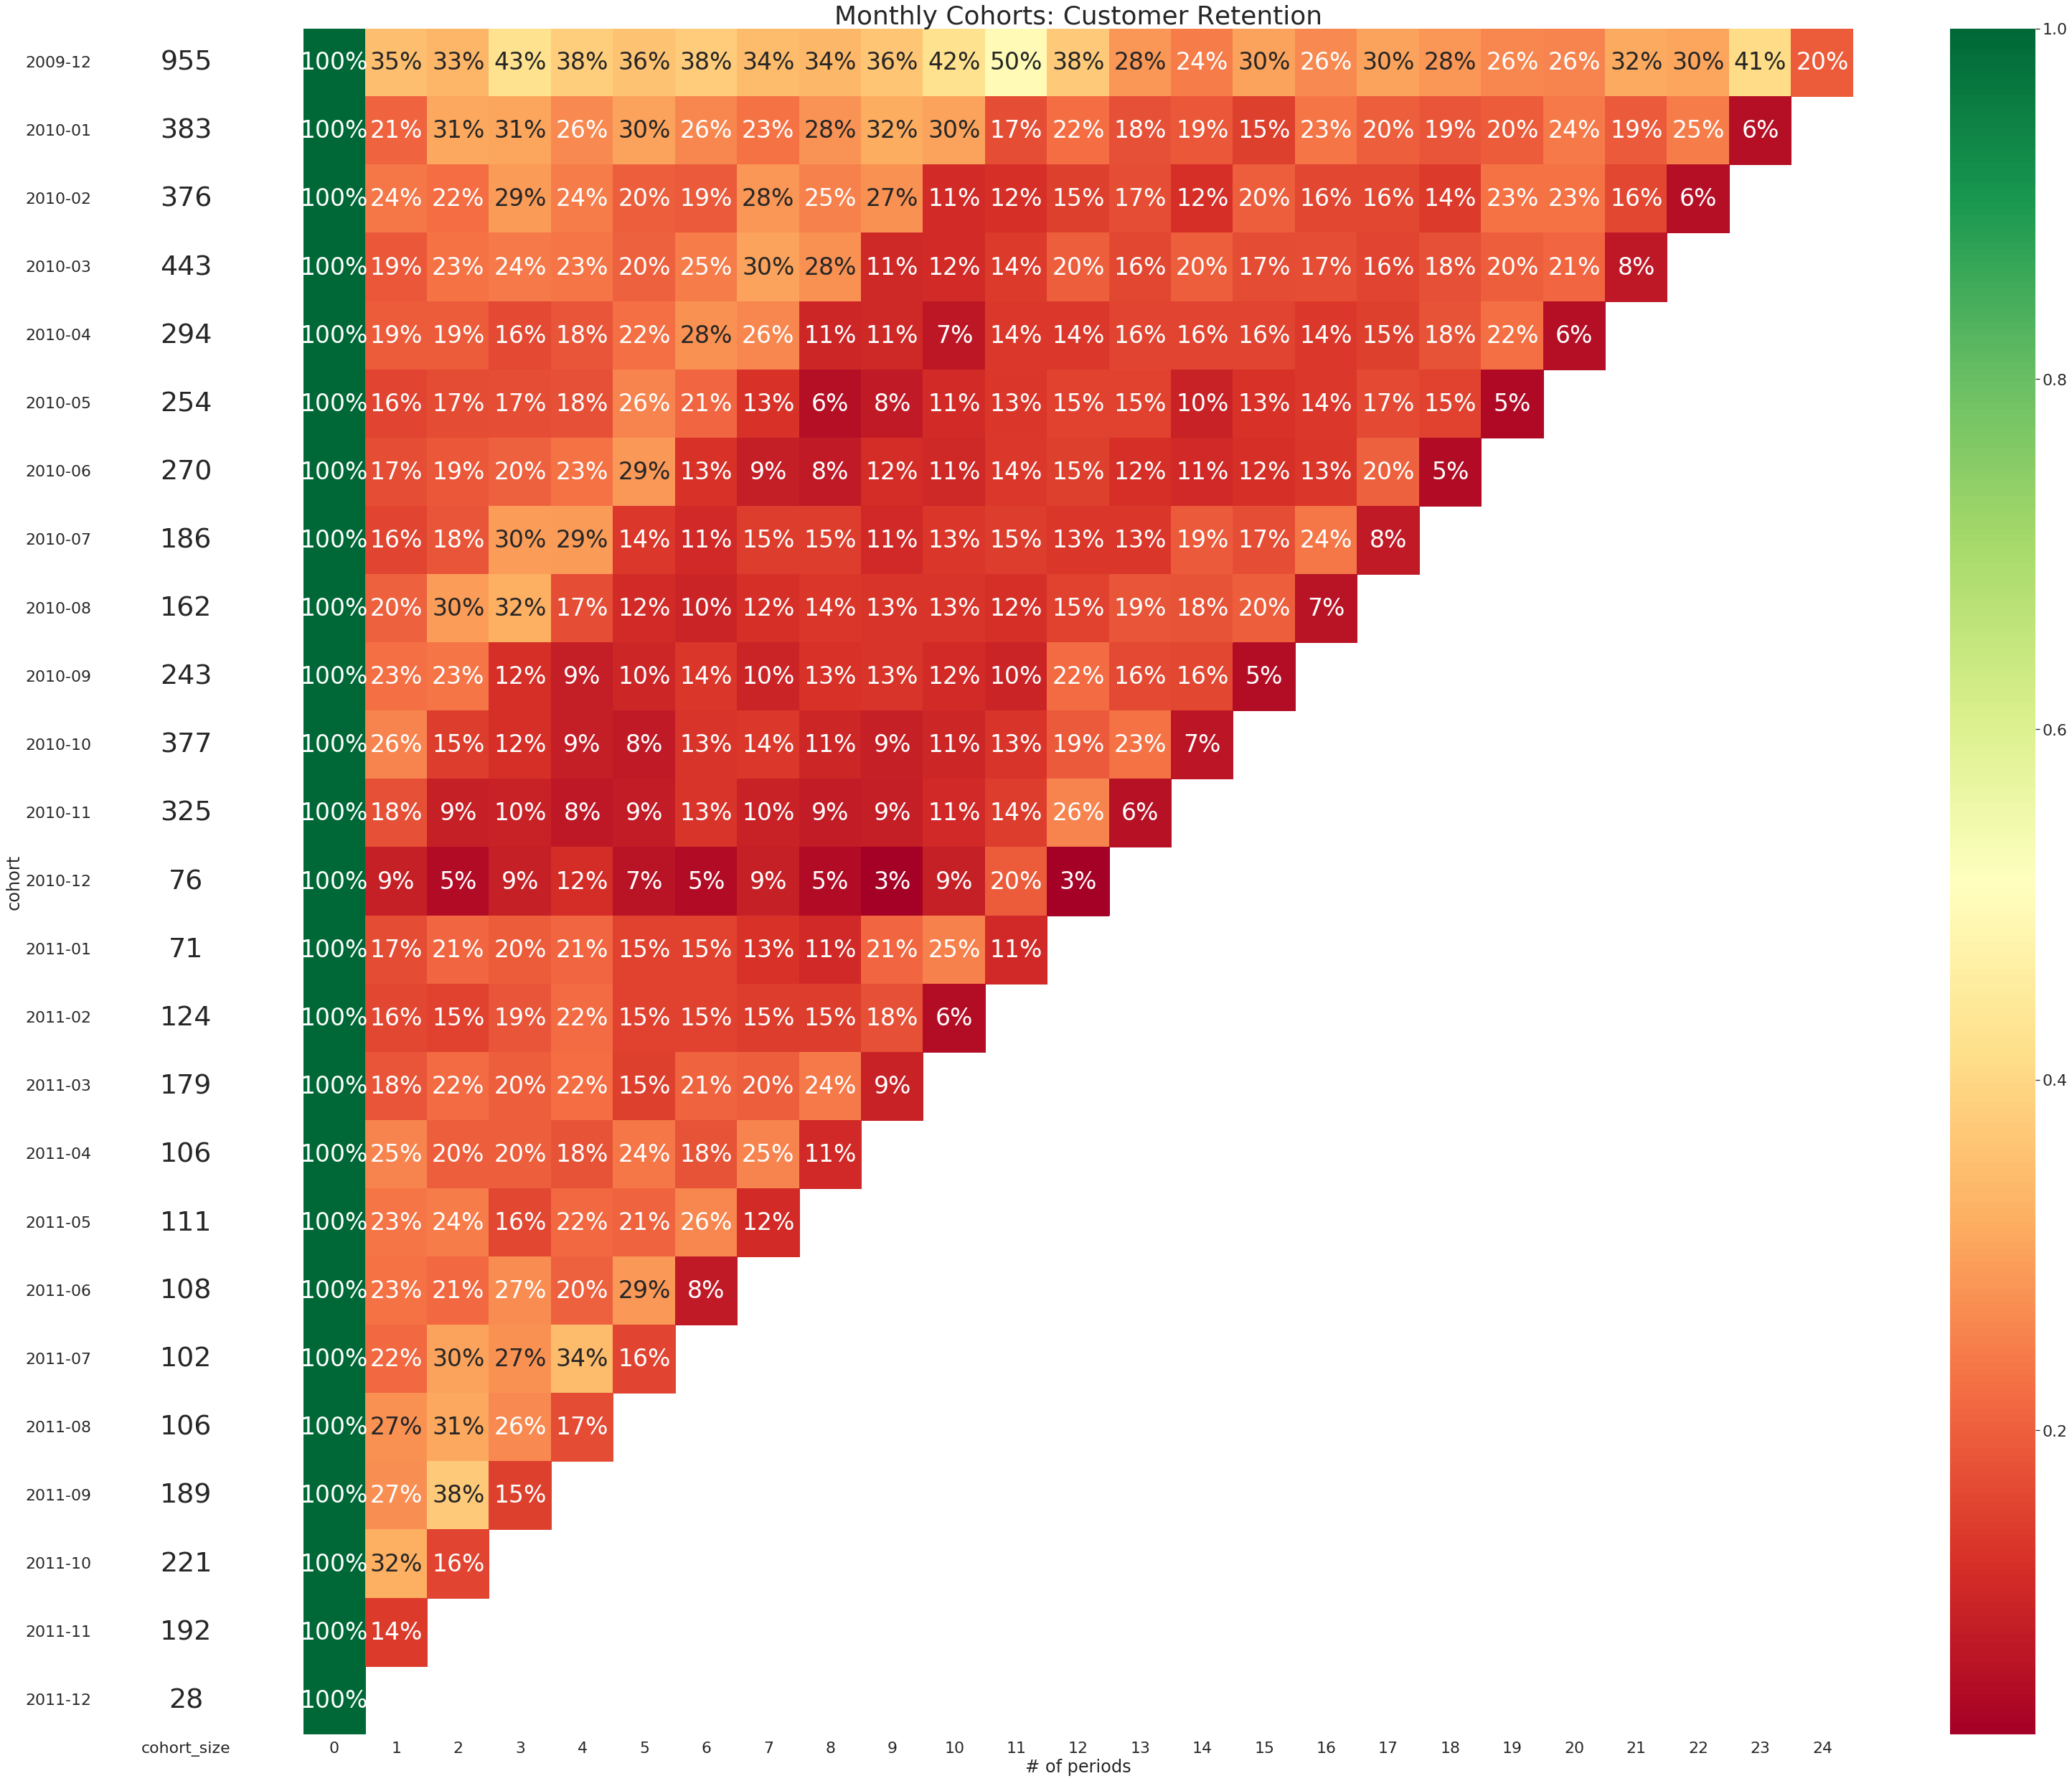

In [60]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(44, 35), sharey=True,gridspec_kw={'width_ratios': [1, 11]})
    sns.set(font_scale = 2)
    # retention matrix

    b=sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1],
               annot_kws={"fontsize":33})
    ax[1].set_title('Monthly Cohorts: Customer Retention', fontsize=36)
    ax[1].set(xlabel='# of periods',
              ylabel='')
    b.set_yticklabels(b.get_yticks(), size = 30)

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0],
               annot_kws={"fontsize":38})

fig.tight_layout()

### Observations

i.	Customers who joined in 2009-12 out of 955 customers only 35% of it showed up in its followed month and 33% of 955 showed up in 2010-02. In a similar way cohort analysis of this retention matrix is done.

ii.	Customer joined in 2010-12 has pretty bad customer retention for its followed months. That is 100%, 9%, 5%, 9%, 12%, 7% and so on.


### 3.2 Net Revenue retention

In [61]:
# We need Revenue 
df_rev = data[['Customer ID','Revenue', 'InvoiceDate']].drop_duplicates()

In [62]:
df_rev['InvoiceDate']=pd.to_datetime(df_rev['InvoiceDate'])

In [63]:
df_rev['order_month'] = df_rev['InvoiceDate'].dt.to_period('M')
df_rev['cohort'] = df_rev.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('M') 

In [64]:
data.shape

(779495, 10)

In [65]:
df_rev

Customer ID  Revenue         InvoiceDate order_month   cohort
0            13085.0    83.40 2009-12-01 07:45:00     2009-12  2009-12
1            13085.0    81.00 2009-12-01 07:45:00     2009-12  2009-12
3            13085.0   100.80 2009-12-01 07:45:00     2009-12  2009-12
4            13085.0    30.00 2009-12-01 07:45:00     2009-12  2009-12
5            13085.0    39.60 2009-12-01 07:45:00     2009-12  2009-12
...              ...      ...                 ...         ...      ...
1067364      12680.0    16.60 2011-12-09 12:50:00     2011-12  2011-08
1067365      12680.0    10.20 2011-12-09 12:50:00     2011-12  2011-08
1067366      12680.0    12.60 2011-12-09 12:50:00     2011-12  2011-08
1067369      12680.0    14.85 2011-12-09 12:50:00     2011-12  2011-08
1067370      12680.0    18.00 2011-12-09 12:50:00     2011-12  2011-08

[476379 rows x 5 columns]

In [66]:
# Grouping wrt cohort, order_month and aggregating with revenue sum
df_cohort_rev = df_rev.groupby(['cohort', 'order_month']) \
              .agg(revenue_sum=('Revenue','sum')) \
              .reset_index(drop=False)
df_cohort_rev['period_number'] = (df_cohort_rev.order_month - df_cohort_rev.cohort).apply(attrgetter('n'))

In [67]:
df_cohort_rev

cohort order_month  revenue_sum  period_number
0    2009-12     2009-12   504442.350              0
1    2009-12     2010-01   292268.591              1
2    2009-12     2010-02   212398.632              2
3    2009-12     2010-03   275352.530              3
4    2009-12     2010-04   225027.630              4
..       ...         ...          ...            ...
320  2011-10     2011-11    24403.770              1
321  2011-10     2011-12     8469.370              2
322  2011-11     2011-11    57229.790              0
323  2011-11     2011-12     9318.070              1
324  2011-12     2011-12    20001.020              0

[325 rows x 4 columns]

In [68]:
cohort_pivot_rev = df_cohort_rev.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'revenue_sum')

In [69]:
cohort_pivot_rev

period_number          0           1           2           3          4   \
cohort                                                                     
2009-12        504442.350  292268.591  212398.632  275352.530  225027.63   
2010-01        114069.191   28585.320   37051.350   41487.311   42973.91   
2010-02        114032.814   24351.510   39489.020   38989.970   30357.21   
2010-03        165831.731   33745.510   36965.580   45303.310   34901.63   
2010-04         82845.911   13565.080   15151.560   22011.050   16173.27   
2010-05         79828.990   10827.350   10359.290    9440.950   12494.76   
2010-06         84802.060   10967.170   15271.100   16864.370   22208.56   
2010-07         52387.590    5945.160    9229.260   17134.330   20133.80   
2010-08         39614.500   10087.010   17623.650   17395.870   10022.33   
2010-09        119272.750   22587.750   23331.150    9711.420   22678.75   
2010-10        129281.260   33930.160   13120.940   17587.000    8589.62   
2010-11         99873.480   18318.660   10600.150    6960.570    7852.10   
2010-12         18765.550    1696.240    5102.550    1230.080    5072.91   
2011-01         41823.930    2660.430    2891.440   25427.960    5869.43   
2011-02         29645.040    6946.050   13186.950    7505.330    6397.60   
2011-03         52948.430   12255.810   15637.910   12966.850   12708.69   
2011-04         28836.490   10118.230    5838.540    5082.180    4329.12   
2011-05         35515.230    6706.200    6714.450    4614.070    7818.93   
2011-06         70081.610    8050.860    5646.520    7562.410    7220.88   
2011-07         29483.841    5065.920    8005.260    8123.010   10780.05   
2011-08         29850.220   12238.500   19091.940   25612.240    8776.82   
2011-09         63858.520   14593.860   23486.560    7124.380        NaN   
2011-10         72459.390   24403.770    8469.370         NaN        NaN   
2011-11         57229.790    9318.070         NaN         NaN        NaN   
2011-12         20001.020         NaN         NaN         NaN        NaN   

period_number         5          6           7          8          9   ...  \
cohort                                                                 ...   
2009-12        224350.89  224334.19  218592.660  231043.75  285067.70  ...   
2010-01         48941.26   38419.10   33900.550   44638.15   55653.82  ...   
2010-02         27972.85   26740.92   35927.211   37224.89   40896.43  ...   
2010-03         40379.93   46724.81   57854.220   56812.50   16353.32  ...   
2010-04         21063.39   24733.88   25063.630    7828.25   13117.09  ...   
2010-05         21944.84   16361.41    6634.050    4339.59    5150.60  ...   
2010-06         34682.13   13059.10   12390.790   19294.05   20148.41  ...   
2010-07          6569.21    6766.16    7509.990    7569.37    6609.96  ...   
2010-08          3813.55    4057.38    5210.910    6816.19    8382.84  ...   
2010-09          5851.32   22059.16    8022.930   26421.82   11774.85  ...   
2010-10          8244.92   12253.64   11717.230   18043.51   15145.36  ...   
2010-11          8135.85   11273.35    9559.150    7479.53    8316.76  ...   
2010-12           787.68     545.12    3771.930     584.14     379.33  ...   
2011-01          4789.82    3438.44    3032.050    2807.46    8596.39  ...   
2011-02          3990.63    6786.62    7234.780    7878.87   10671.82  ...   
2011-03          7948.32   11644.68   13385.090   16216.93    5305.89  ...   
2011-04          7182.17    4245.74    8189.790    2743.87        NaN  ...   
2011-05          7437.58   10208.76  171408.100        NaN        NaN  ...   
2011-06         11537.68    1891.33         NaN        NaN        NaN  ...   
2011-07          2907.44        NaN         NaN        NaN        NaN  ...   
2011-08              NaN        NaN         NaN        NaN        NaN  ...   
2011-09              NaN        NaN         NaN        NaN        NaN  ...   
2011-10              NaN        NaN         NaN        NaN        NaN  ... 

In [70]:
#first column data
cohort_size_rev = cohort_pivot_rev.iloc[:,0]

# To get the retention matrix we divide the whole column with its first column respectively.
retention_matrix_rev = cohort_pivot_rev.divide(cohort_size_rev, axis = 0)

In [71]:
retention_matrix_rev

period_number   0         1         2         3         4         5   \
cohort                                                                 
2009-12        1.0  0.579389  0.421056  0.545855  0.446092  0.444750   
2010-01        1.0  0.250596  0.324815  0.363703  0.376735  0.429049   
2010-02        1.0  0.213548  0.346295  0.341919  0.266215  0.245305   
2010-03        1.0  0.203492  0.222910  0.273188  0.210464  0.243499   
2010-04        1.0  0.163739  0.182888  0.265687  0.195221  0.254248   
2010-05        1.0  0.135632  0.129769  0.118265  0.156519  0.274898   
2010-06        1.0  0.129327  0.180079  0.198867  0.261887  0.408977   
2010-07        1.0  0.113484  0.176173  0.327068  0.384324  0.125396   
2010-08        1.0  0.254629  0.444879  0.439129  0.252997  0.096267   
2010-09        1.0  0.189379  0.195612  0.081422  0.190142  0.049058   
2010-10        1.0  0.262452  0.101491  0.136037  0.066441  0.063775   
2010-11        1.0  0.183419  0.106136  0.069694  0.078620  0.081462   
2010-12        1.0  0.090391  0.271910  0.065550  0.270331  0.041975   
2011-01        1.0  0.063610  0.069134  0.607976  0.140337  0.114523   
2011-02        1.0  0.234307  0.444828  0.253173  0.215807  0.134614   
2011-03        1.0  0.231467  0.295342  0.244896  0.240020  0.150114   
2011-04        1.0  0.350883  0.202471  0.176241  0.150126  0.249065   
2011-05        1.0  0.188826  0.189058  0.129918  0.220157  0.209419   
2011-06        1.0  0.114878  0.080571  0.107909  0.103035  0.164632   
2011-07        1.0  0.171820  0.271513  0.275507  0.365626  0.098611   
2011-08        1.0  0.409997  0.639591  0.858025  0.294029       NaN   
2011-09        1.0  0.228534  0.367791  0.111565       NaN       NaN   
2011-10        1.0  0.336792  0.116884       NaN       NaN       NaN   
2011-11        1.0  0.162819       NaN       NaN       NaN       NaN   
2011-12        1.0       NaN       NaN       NaN       NaN       NaN   

period_number        6         7         8         9   ...        15  \
cohort                                                 ...             
2009-12        0.444717  0.433335  0.458018  0.565115  ...  0.364034   
2010-01        0.336805  0.297193  0.391325  0.487895  ...  0.184207   
2010-02        0.234502  0.315060  0.326440  0.358637  ...  0.229353   
2010-03        0.281760  0.348873  0.342591  0.098614  ...  0.143265   
2010-04        0.298553  0.302533  0.094492  0.158331  ...  0.190496   
2010-05        0.204956  0.083103  0.054361  0.064520  ...  0.110780   
2010-06        0.153995  0.146114  0.227519  0.237593  ...  0.158848   
2010-07        0.129156  0.143354  0.144488  0.126174  ...  0.211394   
2010-08        0.102422  0.131540  0.172063  0.211610  ...  0.376935   
2010-09        0.184947  0.067265  0.221524  0.098722  ...  0.037994   
2010-10        0.094783  0.090634  0.139568  0.117150  ...       NaN   
2010-11        0.112876  0.095713  0.074890  0.083273  ...       NaN   
2010-12        0.029049  0.201003  0.031128  0.020214  ...       NaN   
2011-01        0.082212  0.072496  0.067126  0.205538  ...       NaN   
2011-02        0.228929  0.244047  0.265774  0.359987  ...       NaN   
2011-03        0.219925  0.252795  0.306278  0.100209  ...       NaN   
2011-04        0.147235  0.284008  0.095153       NaN  ...       NaN   
2011-05        0.287447  4.826327       NaN       NaN  ...       NaN   
2011-06        0.026988       NaN       NaN       NaN  ...       NaN   
2011-07             NaN       NaN       NaN       NaN  ...       NaN   
2011-08             NaN       NaN       NaN       NaN  ...       NaN   
2011-09             NaN       NaN       NaN       NaN  ...       NaN   
2011-10             NaN       NaN       NaN       NaN  ...       NaN   
2011-11             NaN       NaN       NaN       NaN  ...       NaN   
2011-12             NaN       NaN       NaN       NaN  ...       NaN   

period_number        16        17        18        19        20        21  \
cohort                           

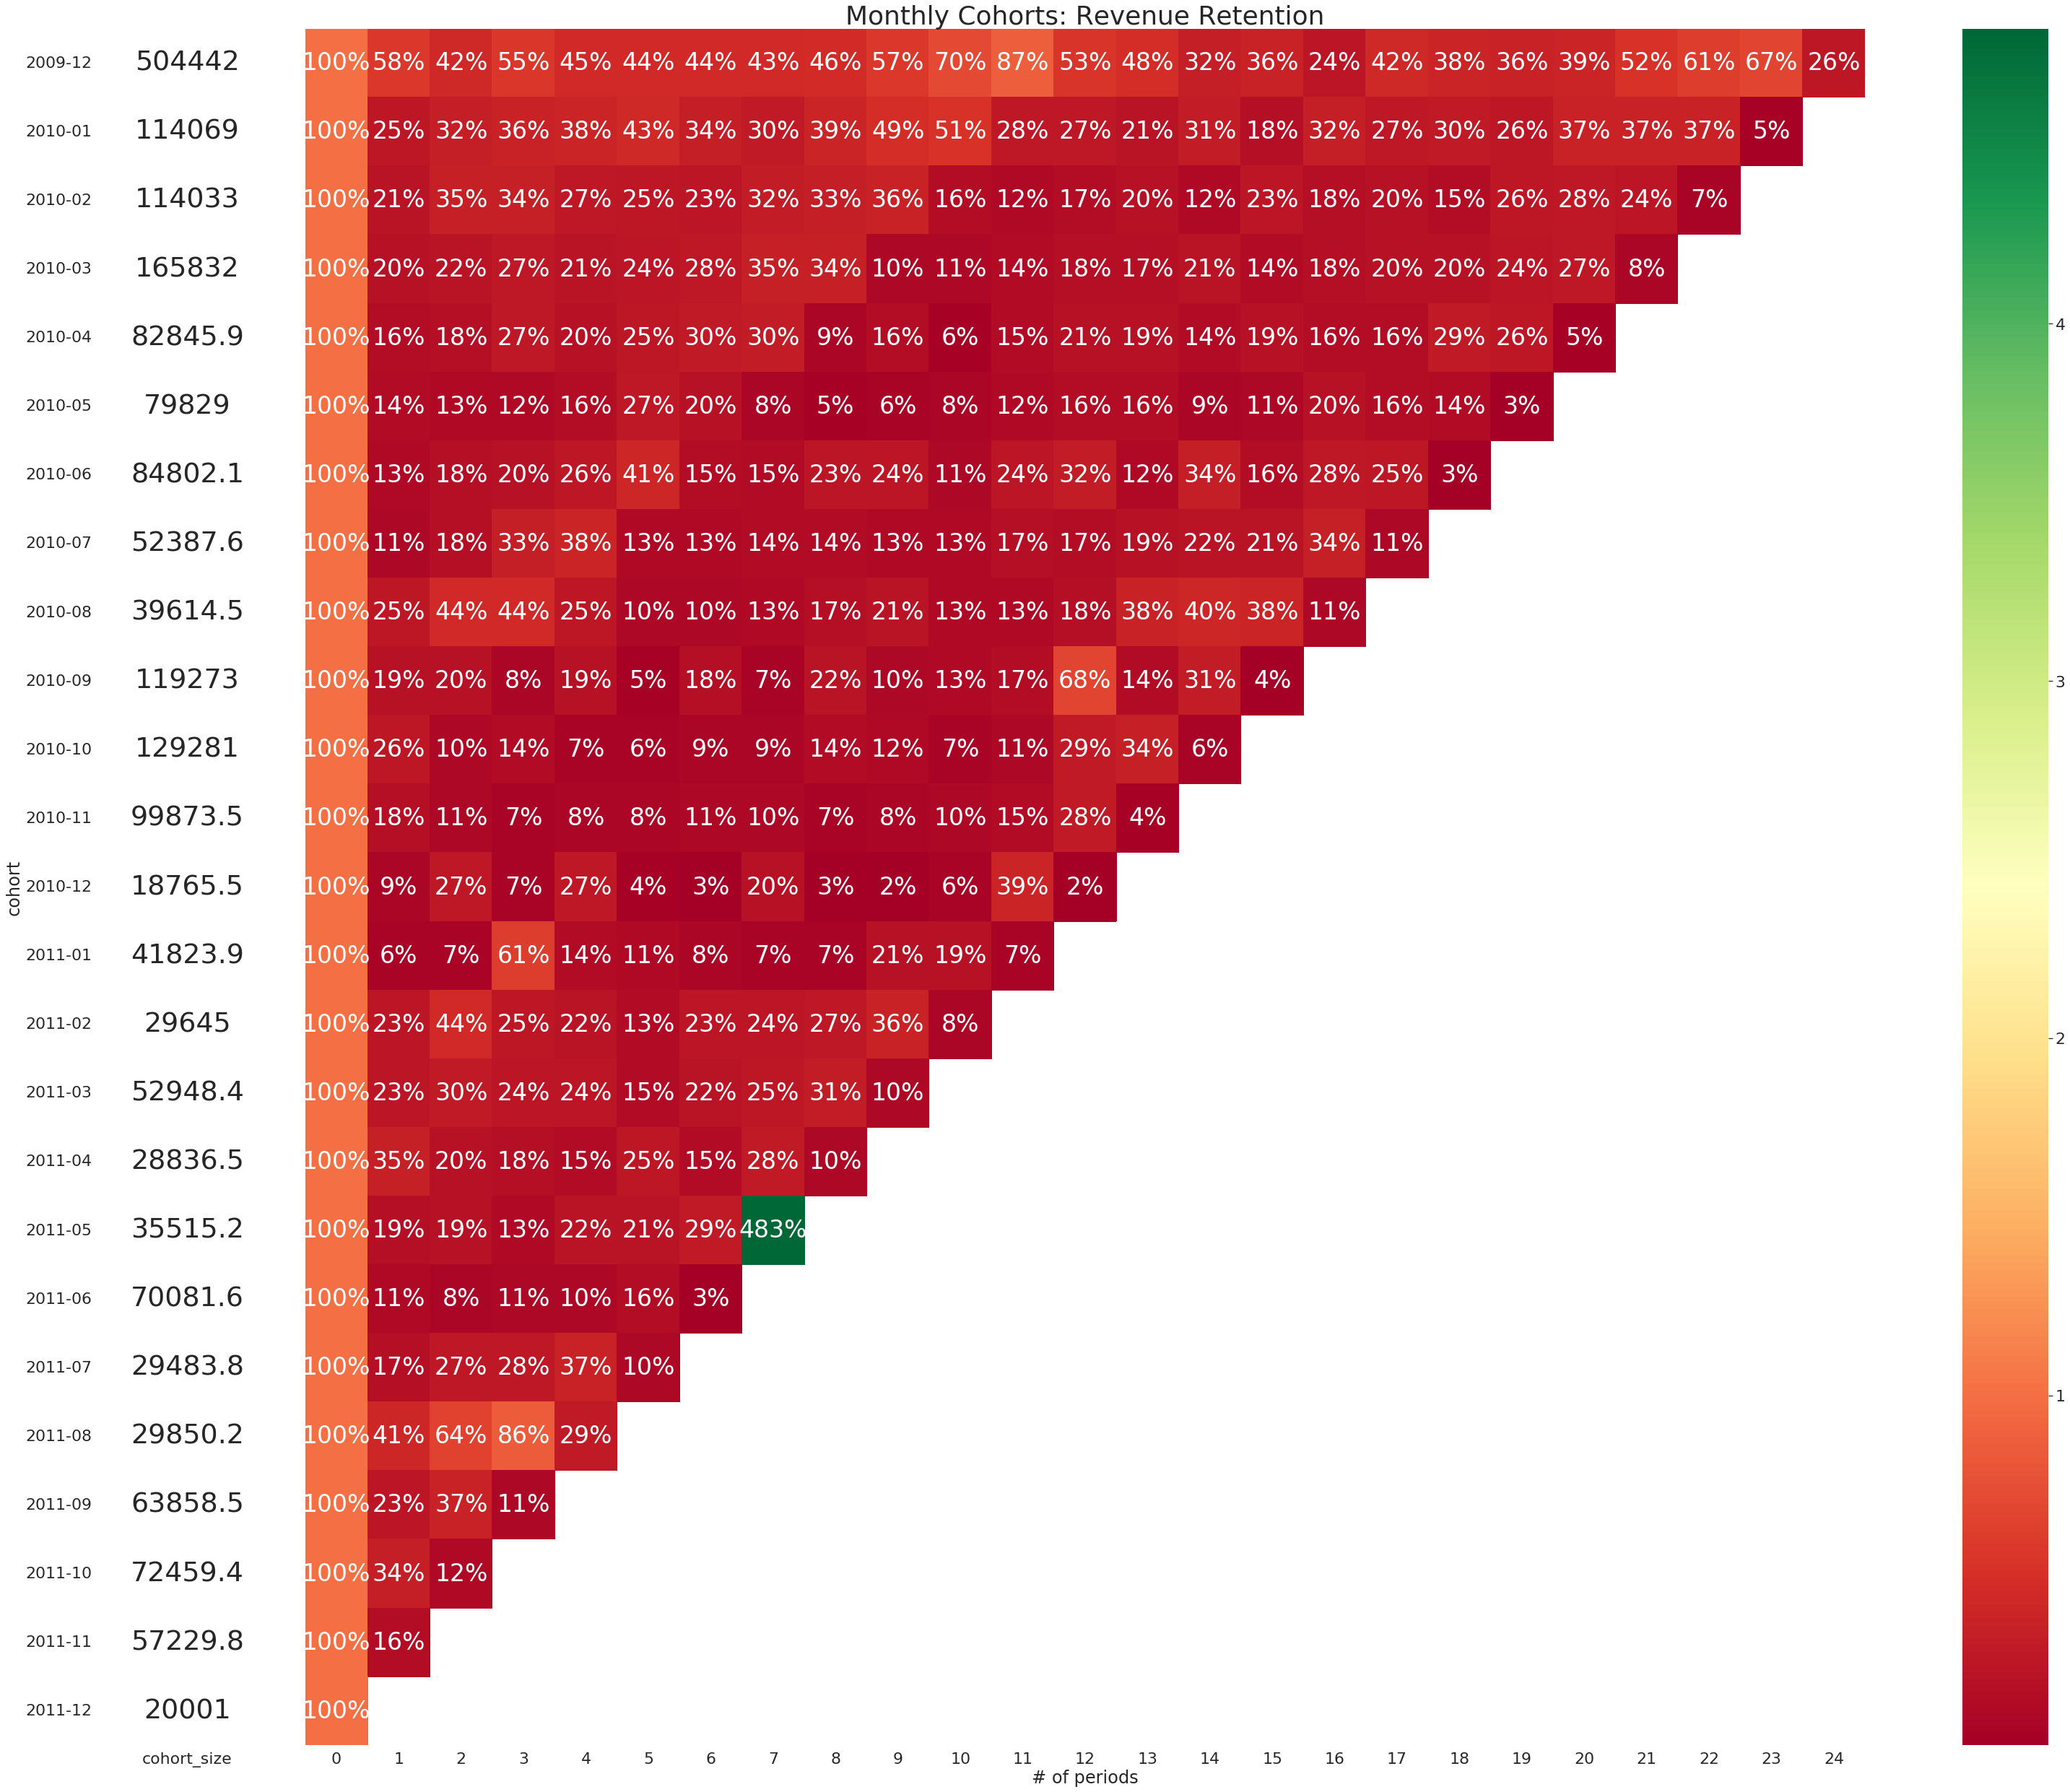

In [72]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(44, 35), sharey=True,gridspec_kw={'width_ratios': [1, 11]})
    sns.set(font_scale = 2)
    # retention matrix

    b=sns.heatmap(retention_matrix_rev, 
                mask=retention_matrix_rev.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1],
               annot_kws={"fontsize":33})
    ax[1].set_title('Monthly Cohorts: Revenue Retention', fontsize=36)
    ax[1].set(xlabel='# of periods',
              ylabel='')
    b.set_yticklabels(b.get_yticks(), size = 30)

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size_rev).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0],
               annot_kws={"fontsize":38})

fig.tight_layout()

### Observations
i.	One of the major observations is normally revenue retention of December is one of the lowest but customers who did the first transaction on 2011-05 has 483% revenue retention for December. Maybe some offers were displayed for December 2010.

ii.	From customer retention and revenue retention matrix, it is observed that for 2011-08 though the customer retention were 27%,31%,26% and 17% for its following month but have observed pretty good revenue retention of 41%,64%,86% and 29% respectively for the followed months. Meaning though there were few customers as compared to their joining date those few customers did spend a pretty good amount.

iii.	For customers joined in 2010-09 have highest revenue retention of 68% for its September 2010. This is the highest revenue retention observed for September 2010. 


### 3.3 Customer lifetime revenue

First we have to find the cummulative revenue wrt period

In [73]:
cohort_pivot_rev

period_number          0           1           2           3          4   \
cohort                                                                     
2009-12        504442.350  292268.591  212398.632  275352.530  225027.63   
2010-01        114069.191   28585.320   37051.350   41487.311   42973.91   
2010-02        114032.814   24351.510   39489.020   38989.970   30357.21   
2010-03        165831.731   33745.510   36965.580   45303.310   34901.63   
2010-04         82845.911   13565.080   15151.560   22011.050   16173.27   
2010-05         79828.990   10827.350   10359.290    9440.950   12494.76   
2010-06         84802.060   10967.170   15271.100   16864.370   22208.56   
2010-07         52387.590    5945.160    9229.260   17134.330   20133.80   
2010-08         39614.500   10087.010   17623.650   17395.870   10022.33   
2010-09        119272.750   22587.750   23331.150    9711.420   22678.75   
2010-10        129281.260   33930.160   13120.940   17587.000    8589.62   
2010-11         99873.480   18318.660   10600.150    6960.570    7852.10   
2010-12         18765.550    1696.240    5102.550    1230.080    5072.91   
2011-01         41823.930    2660.430    2891.440   25427.960    5869.43   
2011-02         29645.040    6946.050   13186.950    7505.330    6397.60   
2011-03         52948.430   12255.810   15637.910   12966.850   12708.69   
2011-04         28836.490   10118.230    5838.540    5082.180    4329.12   
2011-05         35515.230    6706.200    6714.450    4614.070    7818.93   
2011-06         70081.610    8050.860    5646.520    7562.410    7220.88   
2011-07         29483.841    5065.920    8005.260    8123.010   10780.05   
2011-08         29850.220   12238.500   19091.940   25612.240    8776.82   
2011-09         63858.520   14593.860   23486.560    7124.380        NaN   
2011-10         72459.390   24403.770    8469.370         NaN        NaN   
2011-11         57229.790    9318.070         NaN         NaN        NaN   
2011-12         20001.020         NaN         NaN         NaN        NaN   

period_number         5          6           7          8          9   ...  \
cohort                                                                 ...   
2009-12        224350.89  224334.19  218592.660  231043.75  285067.70  ...   
2010-01         48941.26   38419.10   33900.550   44638.15   55653.82  ...   
2010-02         27972.85   26740.92   35927.211   37224.89   40896.43  ...   
2010-03         40379.93   46724.81   57854.220   56812.50   16353.32  ...   
2010-04         21063.39   24733.88   25063.630    7828.25   13117.09  ...   
2010-05         21944.84   16361.41    6634.050    4339.59    5150.60  ...   
2010-06         34682.13   13059.10   12390.790   19294.05   20148.41  ...   
2010-07          6569.21    6766.16    7509.990    7569.37    6609.96  ...   
2010-08          3813.55    4057.38    5210.910    6816.19    8382.84  ...   
2010-09          5851.32   22059.16    8022.930   26421.82   11774.85  ...   
2010-10          8244.92   12253.64   11717.230   18043.51   15145.36  ...   
2010-11          8135.85   11273.35    9559.150    7479.53    8316.76  ...   
2010-12           787.68     545.12    3771.930     584.14     379.33  ...   
2011-01          4789.82    3438.44    3032.050    2807.46    8596.39  ...   
2011-02          3990.63    6786.62    7234.780    7878.87   10671.82  ...   
2011-03          7948.32   11644.68   13385.090   16216.93    5305.89  ...   
2011-04          7182.17    4245.74    8189.790    2743.87        NaN  ...   
2011-05          7437.58   10208.76  171408.100        NaN        NaN  ...   
2011-06         11537.68    1891.33         NaN        NaN        NaN  ...   
2011-07          2907.44        NaN         NaN        NaN        NaN  ...   
2011-08              NaN        NaN         NaN        NaN        NaN  ...   
2011-09              NaN        NaN         NaN        NaN        NaN  ...   
2011-10              NaN        NaN         NaN        NaN        NaN  ... 

In [74]:
#Cumulative revenue wrt period
cohort_pivot_rev_cumsum=cohort_pivot_rev.cumsum(axis=1)

In [75]:
# To get the customer lifetime revenue matrix we have to divide the cumulative revenue matrix with total 
# number of customer in each cohort
retention_matrix_cumsum = cohort_pivot_rev_cumsum.divide(cohort_size, axis = 0)

In [76]:
retention_matrix_cumsum

period_number          0           1            2            3            4   \
cohort                                                                         
2009-12        528.211885  834.252294  1056.659239  1344.986495  1580.617521   
2010-01        297.830786  372.466086   469.205903   577.527864   689.731285   
2010-02        303.278761  368.043415   473.067404   576.764133   657.501394   
2010-03        374.337993  450.512959   533.956707   636.221515   715.006233   
2010-04        281.788813  327.928541   379.464459   454.331976   509.343099   
2010-05        314.287362  356.914724   397.699331   434.868425   484.060394   
2010-06        314.081704  354.700852   411.260481   473.721111   555.975037   
2010-07        281.653710  313.616935   363.236613   455.356667   563.602903   
2010-08        244.533951  306.799444   415.587407   522.969321   584.835556   
2010-09        490.834362  583.788066   679.801029   719.765720   813.093909   
2010-10        342.921114  432.921538   467.725093   514.374960   537.159098   
2010-11        307.303015  363.668123   396.283969   417.701108   441.861415   
2010-12        246.915132  269.234079   336.372895   352.558158   419.306974   
2011-01        589.069437  626.540282   667.264789  1025.405070  1108.073099   
2011-02        239.072903  295.089435   401.435806   461.962661   513.556210   
2011-03        295.801285  364.269497   451.632123   524.072626   595.070894   
2011-04        272.042358  367.497358   422.577925   470.523019   511.363774   
2011-05        319.957027  380.373243   440.863784   482.431982   552.872793   
2011-06        648.903796  723.448796   775.731389   845.753704   912.613704   
2011-07        289.057265  338.723147   417.206088   496.843441   602.530206   
2011-08        281.605849  397.063396   577.176038   818.800943   901.601132   
2011-09        337.875767  415.091958   539.359471   577.054603          NaN   
2011-10        327.870543  438.294842   476.617783          NaN          NaN   
2011-11        298.071823  346.603437          NaN          NaN          NaN   
2011-12        714.322143         NaN          NaN          NaN          NaN   

period_number           5            6            7            8   \
cohort                                                              
2009-12        1815.539919  2050.444830  2279.337668  2521.268296   
2010-01         817.515253   917.826219  1006.339405  1122.888099   
2010-02         731.897271   803.016739   898.567832   997.570199   
2010-03         806.157316   911.630928  1042.227361  1170.472282   
2010-04         580.987282   665.116126   750.366568   776.993269   
2010-05         570.457402   634.872402   660.990709   678.075709   
2010-06         684.427370   732.794407   778.686222   850.145667   
2010-07         598.921237   635.298441   675.674731   716.370269   
2010-08         608.375988   633.421543   665.587654   707.662901   
2010-09         837.173416   927.951852   960.968025  1069.699794   
2010-10         559.028912   591.531936   622.612122   670.472891   
2010-11         466.894800   501.582031   530.994800   554.008738   
2010-12         429.671184   436.843816   486.474474   494.160526   
2011-01        1175.535352  1223.964085  1266.669014  1306.210704   
2011-02         545.738710   600.469516   658.814516   722.353790   
2011-03         639.474916   704.528994   779.306034   869.903408   
2011-04         579.120094   619.174245   696.436415   722.321981   
2011-05         619.878018   711.848829  2256.065946          NaN   
2011-06        1019.444074  1036.956389          NaN          NaN   
2011-07         631.034520          NaN          NaN          NaN   
2011-08                NaN          NaN          NaN          NaN   
2011-09                NaN          NaN          NaN          NaN   
2011-10                NaN          NaN          NaN          NaN   
2011-11                NaN          NaN          NaN          NaN   
2011-12                NaN          NaN      

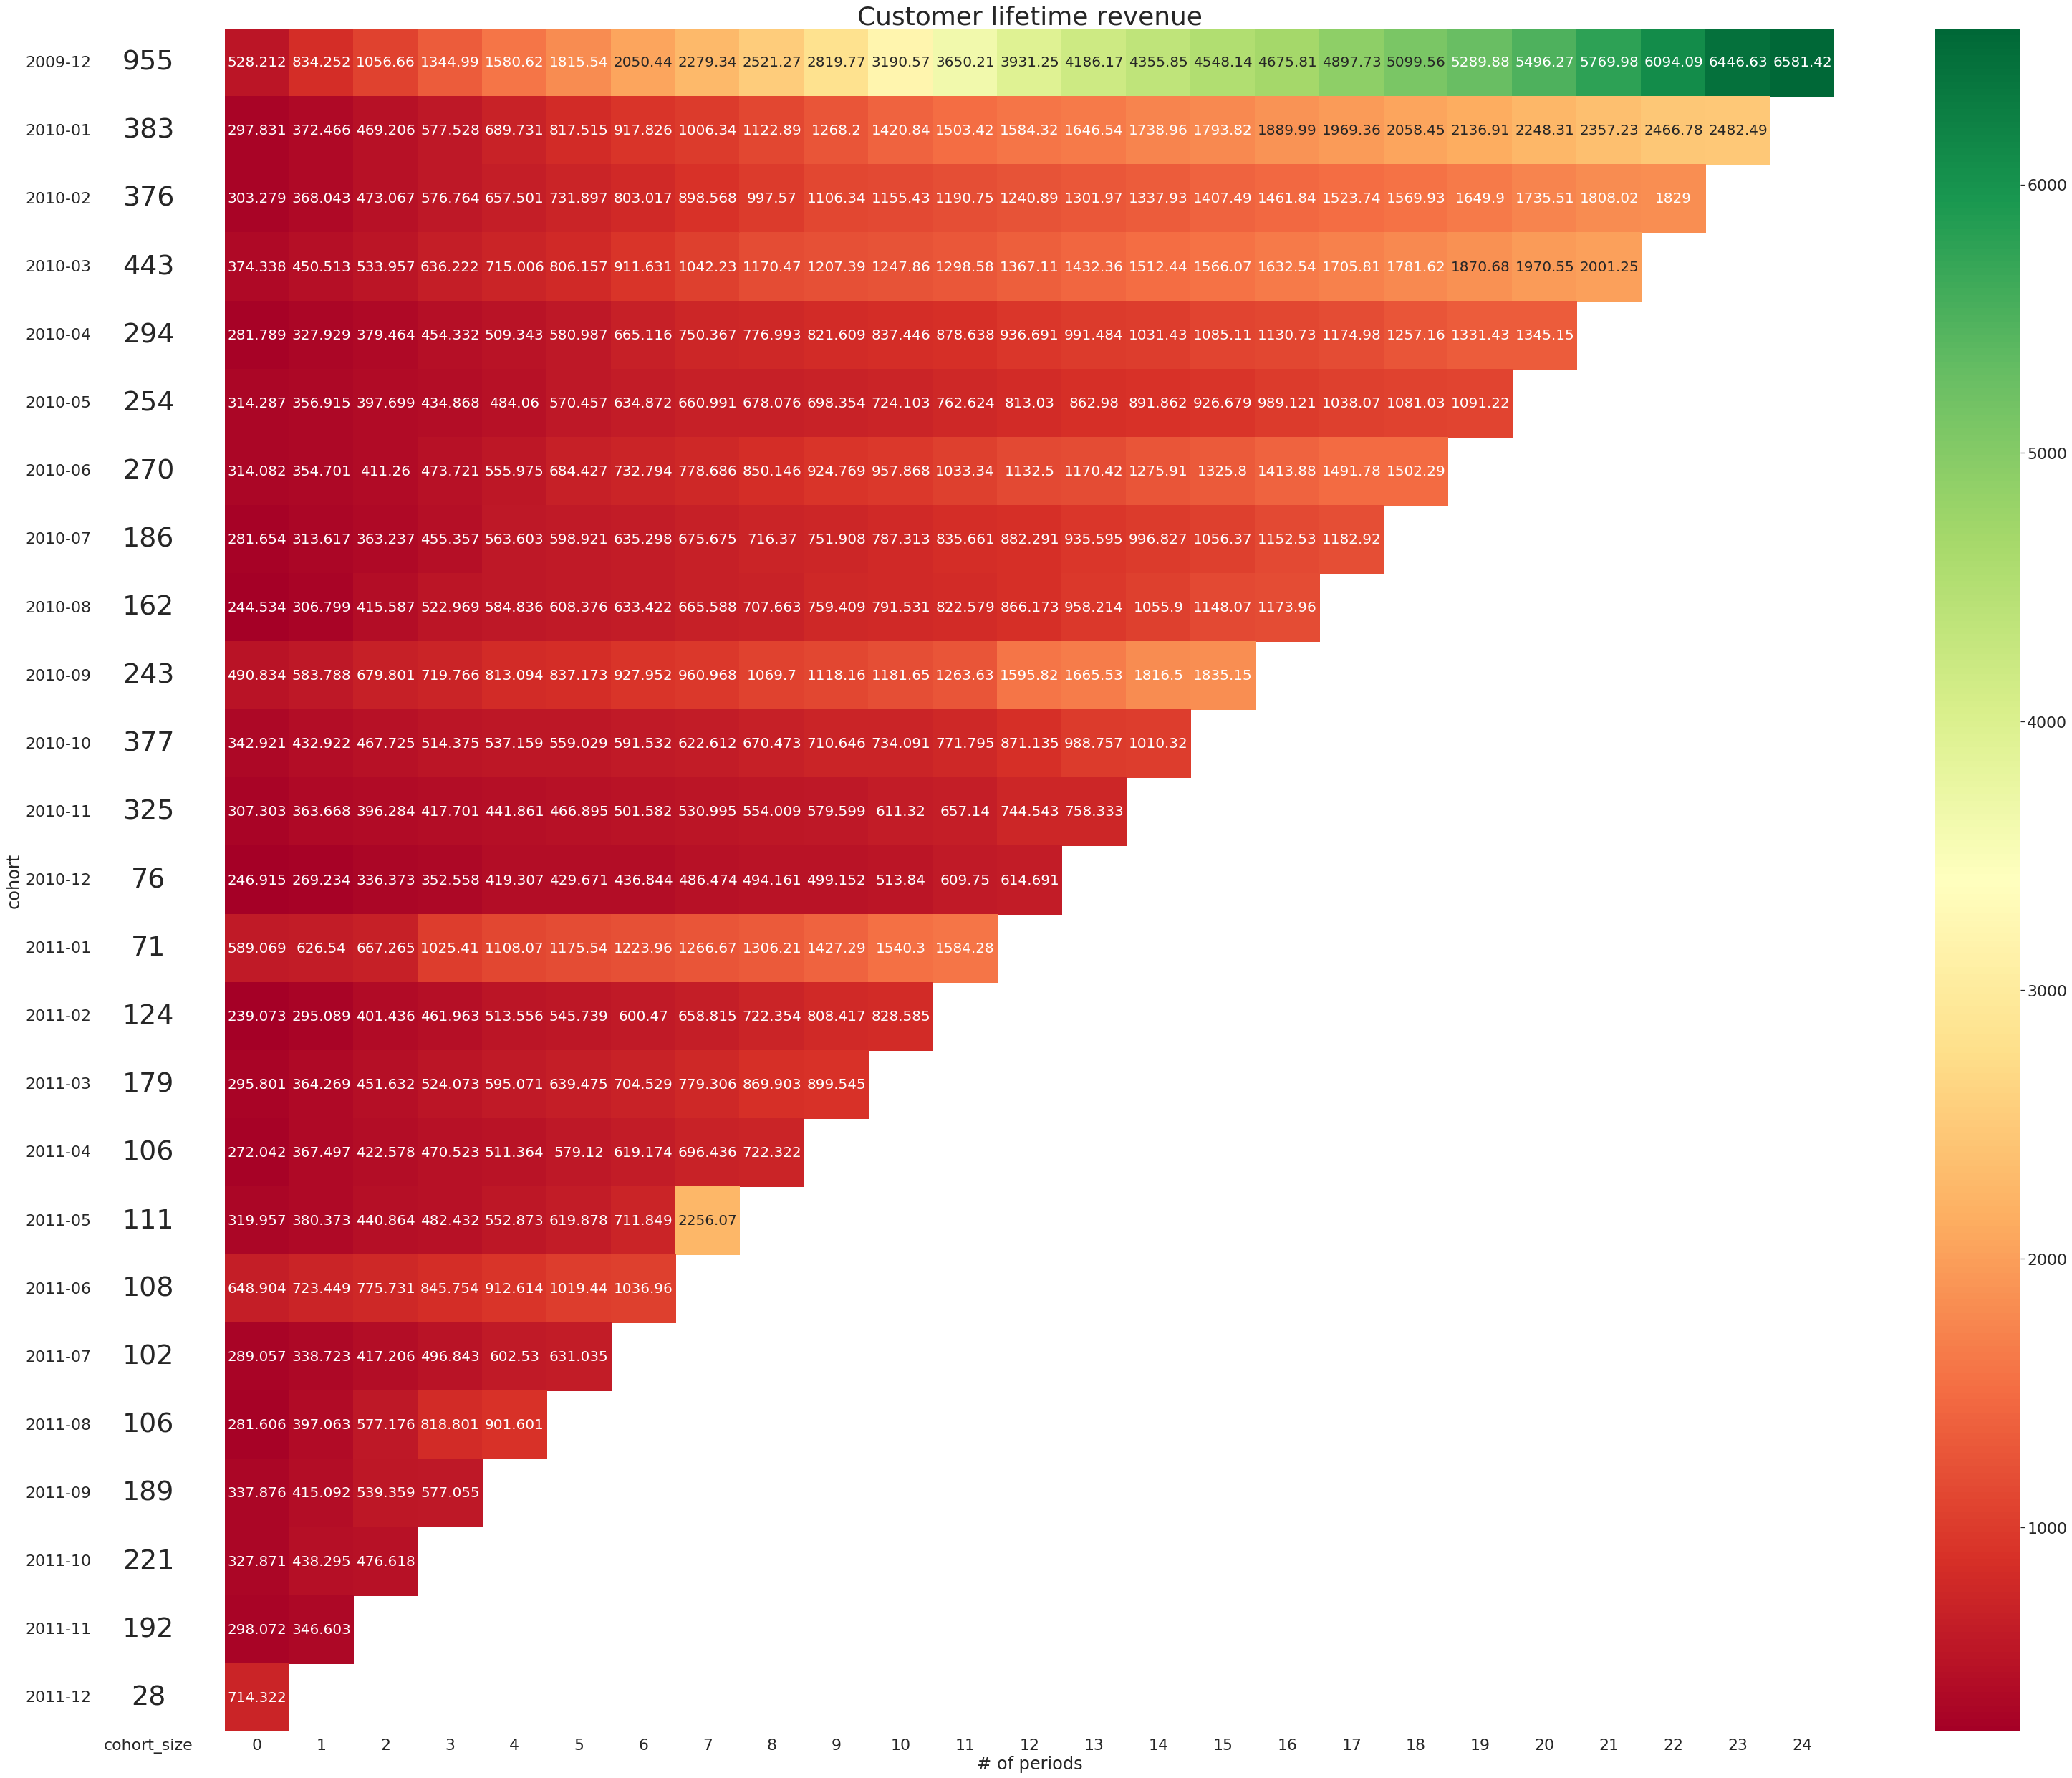

In [77]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(44, 35), sharey=True,gridspec_kw={'width_ratios': [1, 20]})
    sns.set(font_scale = 2)
    # retention matrix

    b=sns.heatmap(retention_matrix_cumsum, 
                mask=retention_matrix_cumsum.isnull(), 
                annot=True, 
                fmt='2g', 
                cmap='RdYlGn', 
                ax=ax[1],
               annot_kws={"fontsize":20})
    ax[1].set_title('Customer lifetime revenue', fontsize=36)
    ax[1].set(xlabel='# of periods',
              ylabel='')
    b.set_yticklabels(b.get_yticks(), size = 25)

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0],
               annot_kws={"fontsize":38})

fig.tight_layout()

### Observation

For each customer we acquired on 2009-12 we made on average 6581.42 at the end. Similarly, we can achieve for other months.

In [78]:
# Getting only 2011-12 data
d=np.fliplr(retention_matrix_cumsum)
diagonal_value_rev=list(np.diagonal(d))

In [79]:
cohort_size_df.reset_index(inplace=True)

In [80]:
cohort_size_df['cohort']=cohort_size_df['cohort'].astype(str)

In [81]:
rev_dict={}
for i,j in zip(list(cohort_size_df['cohort'].to_list()),diagonal_value_rev):
    rev_dict[i]=j
rev_dict

{'2009-12': 6581.423515183247,
 '2010-01': 2482.4862976501304,
 '2010-02': 1828.9992420212768,
 '2010-03': 2001.252914221219,
 '2010-04': 1345.1496972789118,
 '2010-05': 1091.223188976378,
 '2010-06': 1502.2923703703702,
 '2010-07': 1182.9235483870966,
 '2010-08': 1173.9583950617282,
 '2010-09': 1835.1474526748973,
 '2010-10': 1010.3201856763926,
 '2010-11': 758.3334153846155,
 '2010-12': 614.6905263157895,
 '2011-01': 1584.2774647887327,
 '2011-02': 828.585241935484,
 '2011-03': 899.545251396648,
 '2011-04': 722.3219811320754,
 '2011-05': 2256.065945945946,
 '2011-06': 1036.956388888889,
 '2011-07': 631.0345196078432,
 '2011-08': 901.6011320754717,
 '2011-09': 577.0546031746032,
 '2011-10': 476.61778280542984,
 '2011-11': 346.6034375,
 '2011-12': 714.3221428571429}

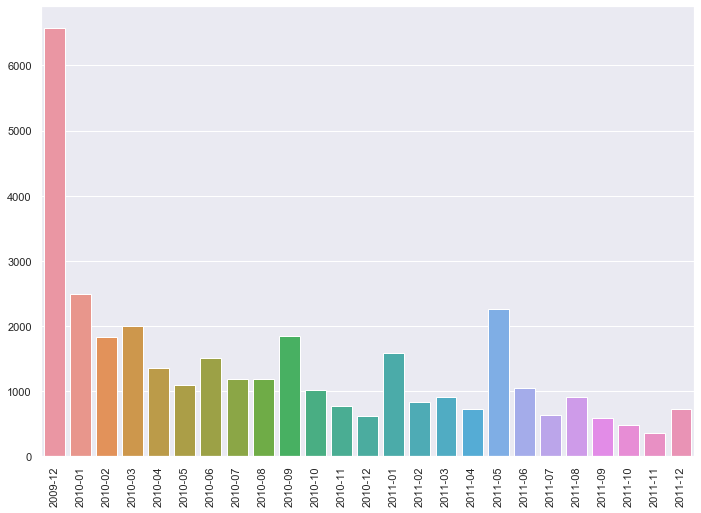

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=90)
ax=sns.barplot(x=list(rev_dict.keys()), y=list(rev_dict.values()),order=list(rev_dict.keys()))
#ax.bar_label(ax.containers[0])
plt.show()

### Observations:

The average revenue per customer is highest for customers joined in 2009-12 followed by 2010-01 and 2011-05.

# 4. Recency, Frequency, Monetary (RFM analysis-Customer segmentation)

Method applied:

i.	For recency: Subtraction between the last transaction date and today’s date (09-12-2011) is performed. While doing this we can get the number of days he/she has been inactive giving us its recent engage status.

ii.	For frequency: It is the total number of unique Invoice per customer, with this we can get how many times a particular customer has purchased the product.

iii.For monetary: It is the sum of total revenue with respect to each customer with this we get the total amount of money spent by each customer.


In [83]:
data_c=copy.deepcopy(data)

In [84]:
data_c

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Revenue  \
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40   
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00   
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00   
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80   
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00   
...                     ...    ...          ...             ...      ...   
1067366 2011-12-09 12:50:00   2.10      12680.0          France    12.60   
1067367 2011-12-09 12:50:00   4.15      12680.0          France    16.60   
1067368 2011-12-09 12:50:00   4.15      12680.0          France    16.60   
1067369 2011-12-09 12:50:00   4.95      12680.0          France    14.85   
1067370 2011-12-09 12:50:00  18.00      12680.0          France    18.00   

        month_year  
0          2009-12  
1          2009-12  
2          2009-12  
3          2009-12  
4          2009-12  
...            ...  
1067366    2011-12  
1067367    2011-12  
1067368    2011-12  
1067369    2011-12  
1067370    2011-12  

[779495 rows x 10 columns]

In [85]:
data_c["InvoiceDate"].max()
today_date = datetime.datetime(2011, 12, 9) #max date in dataset
data_c['InvoiceDate']=pd.to_datetime(data_c['InvoiceDate'])

In [86]:
data_c['date'] =data_c['InvoiceDate'].apply(lambda x:x.strftime('%Y-%m-%d')) #extracting only date

In [87]:
data_c

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Revenue  \
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40   
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00   
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00   
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80   
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00   
...                     ...    ...          ...             ...      ...   
1067366 2011-12-09 12:50:00   2.10      12680.0          France    12.60   
1067367 2011-12-09 12:50:00   4.15      12680.0          France    16.60   
1067368 2011-12-09 12:50:00   4.15      12680.0          France    16.60   
1067369 2011-12-09 12:50:00   4.95      12680.0          France    14.85   
1067370 2011-12-09 12:50:00  18.00      12680.0          France    18.00   

        month_year        date  
0          2009-12  2009-12-01  
1          2009-12  2009-12-01  
2          2009-12  2009-12-01  
3          2009-12  2009-12-01  
4          2009-12  2009-12-01  
...            ...         ...  
1067366    2011-12  2011-12-09  
1067367    2011-12  2011-12-09  
1067368    2011-12  2011-12-09  
1067369    2011-12  2011-12-09  
1067370    2011-12  2011-12-09  

[779495 rows x 11 columns]

In [88]:
data_c['date']=pd.to_datetime(data_c['date'])

In [89]:
#Creating rfm dataset using the above method
rfm = data_c.groupby('Customer ID').agg({'date': lambda date: (today_date - date.max()).days,
                                     'Invoice': lambda num: num.nunique(),
                                     'Revenue': lambda Revenue: Revenue.sum()})
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

recency  frequency  monetary
Customer ID                              
12346.0          325         12  77556.46
12347.0            2          8   4921.53
12348.0           75          5   2019.40
12349.0           18          4   4428.69
12350.0          310          1    334.40

In [90]:
rfm.describe().T

count         mean           std  min    25%    50%      75%  \
recency    5881.0   200.992858    209.489651  0.0   25.0   95.0   379.00   
frequency  5881.0     6.287196     13.012879  1.0    1.0    3.0     7.00   
monetary   5881.0  2954.396237  14437.322635  0.0  341.9  865.6  2247.72   

                 max  
recency       738.00  
frequency     398.00  
monetary   580987.04

In [91]:
rfm.shape

(5881, 3)

In [92]:
# Rows containing monetary as 0 is removed (monetary 0 were observed for a 
# few customers as few of the test product were free of cost)
rfm=rfm[rfm['monetary'] > 0]

In [93]:
rfm.shape

(5878, 3)

In [94]:
rfm.describe().T

count         mean           std   min     25%     50%       75%  \
recency    5878.0   200.866791    209.353961  0.00   25.00   95.00   379.000   
frequency  5878.0     6.289895     13.015651  1.00    1.00    3.00     7.000   
monetary   5878.0  2955.904095  14440.852688  2.95  342.28  867.74  2248.305   

                 max  
recency       738.00  
frequency     398.00  
monetary   580987.04

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


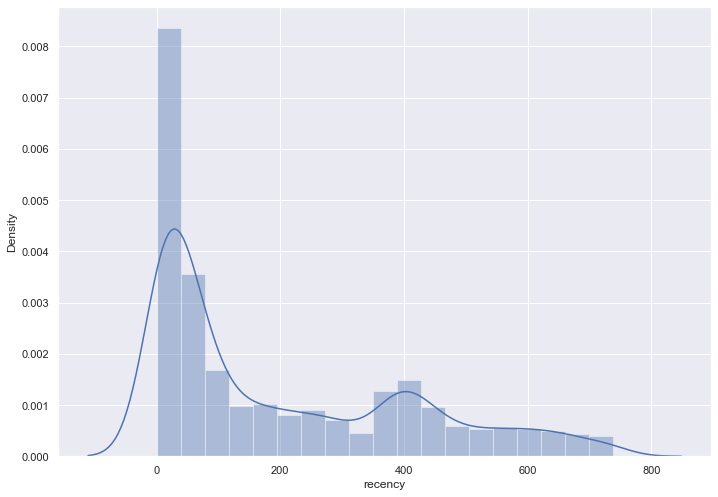

In [95]:
ax = sns.distplot(rfm['recency'])

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


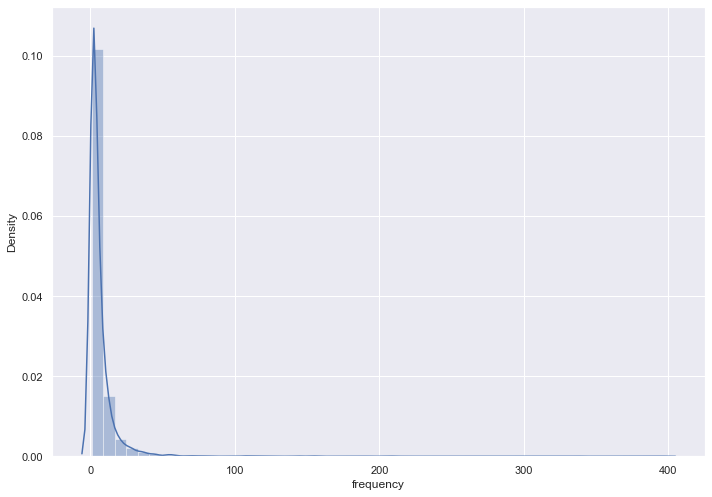

In [96]:
ax = sns.distplot(rfm['frequency'])

C:\Users\Swati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


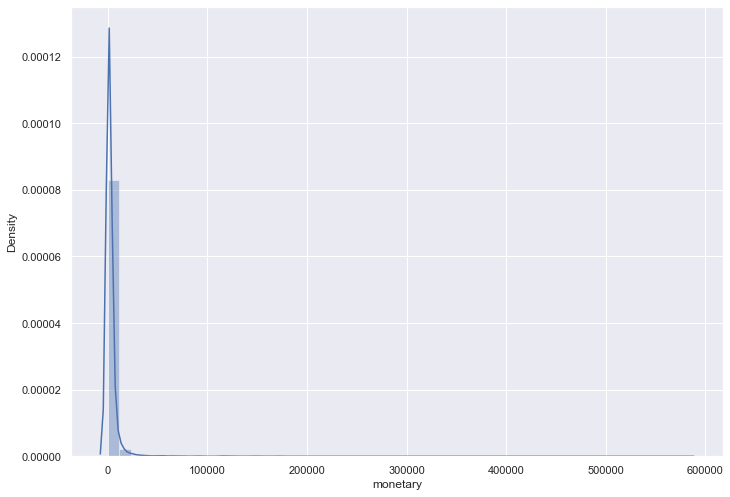

In [97]:
ax = sns.distplot(rfm['monetary'])

In [98]:
rfm.reset_index(inplace=True)

For recency_score: Customers with lower recency are more valuable than those with high recency for instance someone who shopped 5 days ago is more likely to become a customer than someone whose last seen was 100 days ago. We are using qcut() to achieve this



In [99]:
# Recency
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])

In [100]:
rfm.groupby('recency_score').agg(
    count=('Customer ID', 'count'),
    min_recency=('recency', min),
    max_recency=('recency', max),
    std_recency=('recency', 'std'),    
    avg_recency=('recency', 'mean')
).sort_values(by='avg_recency')

count  min_recency  max_recency  std_recency  avg_recency
recency_score                                                           
5               1215            0           19     5.912250     8.799177
4               1140           21           58    11.272954    36.140351
3               1180           59          189    39.299417   107.621186
2               1175          190          410    70.411754   311.291915
1               1168          411          738    99.029827   544.557363

### Observation:

It shows that recency_score of 5 has recency range of 0-19. 

#### ---------------------------------------------------------------------------

For monetary_score: Customer with high monetary gets the 5 score and customer with low monetary gets 1 score as we again divide the monetary into 5 buckets.

In [101]:
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [102]:
rfm_monetary_group=rfm.groupby('monetary_score').agg(
    count=('Customer ID', 'count'),
    min_monetary=('monetary', min),
    max_monetary=('monetary', max),
    std_monetary=('monetary', 'std'),
    avg_monetary=('monetary', 'mean')
).sort_values(by='avg_monetary')

In [103]:
rfm_monetary_group

count  min_monetary  max_monetary  std_monetary  avg_monetary
monetary_score                                                               
1                1176          2.95        285.56     67.338328    162.007092
2                1175        285.60        608.86     91.790177    422.661371
3                1176        609.30       1220.90    176.902027    883.295207
4                1175       1220.91       2909.86    476.950501   1895.428624
5                1176       2910.23     580987.04  30846.980336  11413.072297

### Observation

It can be observed that the standard deviation for score 5 is way too high as we had highly skewed data we get. This highlights the potential drawback of using quantile-based discretization on skewed data.

#### --------------------------------------------------------

For frequency_score: Customer with high frequency gets the 5 score and customer with low frequency gets 1 score as we again divide the frequency into 5 buckets.

In [104]:
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [105]:
rfm.groupby('frequency_score').agg(
    count=('Customer ID', 'count'),
    min_frequency=('frequency', min),
    max_frequency=('frequency', max),
    std_frequency=('frequency', 'std'),
    avg_frequency=('frequency', 'mean')
).sort_values(by='avg_frequency')

count  min_frequency  max_frequency  std_frequency  \
frequency_score                                                       
1                 1176              1              1       0.000000   
2                 1175              1              2       0.485698   
3                 1176              2              4       0.656592   
4                 1175              4              8       1.228229   
5                 1176              8            398      24.430446   

                 avg_frequency  
frequency_score                 
1                     1.000000  
2                     1.619574  
3                     3.068027  
4                     5.768511  
5                    19.988946

In [106]:
rfm.set_index('Customer ID')

recency  frequency  monetary recency_score monetary_score  \
Customer ID                                                              
12346.0          325         12  77556.46             2              5   
12347.0            2          8   4921.53             5              5   
12348.0           75          5   2019.40             3              4   
12349.0           18          4   4428.69             5              5   
12350.0          310          1    334.40             2              2   
...              ...        ...       ...           ...            ...   
18283.0            3         22   2664.90             5              4   
18284.0          431          1    461.68             1              2   
18285.0          660          1    427.00             1              2   
18286.0          476          2   1296.43             1              4   
18287.0           42          7   4182.99             4              5   

            frequency_score  
Customer ID                  
12346.0                   5  
12347.0                   4  
12348.0                   4  
12349.0                   3  
12350.0                   1  
...                     ...  
18283.0                   5  
18284.0                   2  
18285.0                   2  
18286.0                   3  
18287.0                   4  

[5878 rows x 6 columns]

In [107]:
#Concatinating R + F + M
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str)+
                   rfm['monetary_score'].astype(str))

rfm.head()

Customer ID  recency  frequency  monetary recency_score monetary_score  \
0      12346.0      325         12  77556.46             2              5   
1      12347.0        2          8   4921.53             5              5   
2      12348.0       75          5   2019.40             3              4   
3      12349.0       18          4   4428.69             5              5   
4      12350.0      310          1    334.40             2              2   

  frequency_score RFM_SCORE  
0               5       255  
1               4       545  
2               4       344  
3               3       535  
4               1       212

In [108]:
rfm.dtypes

Customer ID         float64
recency               int64
frequency             int64
monetary            float64
recency_score      category
monetary_score     category
frequency_score    category
RFM_SCORE            object
dtype: object

In [109]:
rfm.set_index('Customer ID')

recency  frequency  monetary recency_score monetary_score  \
Customer ID                                                              
12346.0          325         12  77556.46             2              5   
12347.0            2          8   4921.53             5              5   
12348.0           75          5   2019.40             3              4   
12349.0           18          4   4428.69             5              5   
12350.0          310          1    334.40             2              2   
...              ...        ...       ...           ...            ...   
18283.0            3         22   2664.90             5              4   
18284.0          431          1    461.68             1              2   
18285.0          660          1    427.00             1              2   
18286.0          476          2   1296.43             1              4   
18287.0           42          7   4182.99             4              5   

            frequency_score RFM_SCORE  
Customer ID                            
12346.0                   5       255  
12347.0                   4       545  
12348.0                   4       344  
12349.0                   3       535  
12350.0                   1       212  
...                     ...       ...  
18283.0                   5       554  
18284.0                   2       122  
18285.0                   2       122  
18286.0                   3       134  
18287.0                   4       445  

[5878 rows x 7 columns]

In [110]:
rfm=rfm.astype(float) #converting all columns datatypes to float

Taking only columns 'recency_score','frequency_score','monetary_score','RFM_SCORE' for clustering 

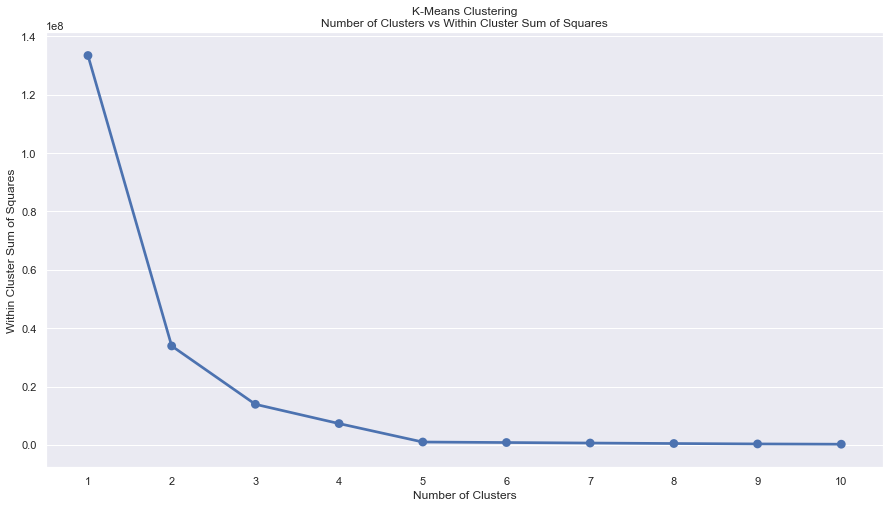

In [111]:
# creating a list to store the within-the-cluster-sum-of-squared-distance
wcss = []

# looping over number of clusters and storing wcss
for k in range(0, 10):
  kmeans = KMeans(n_clusters=k+1, random_state=0).fit(rfm[['recency_score',
                                                          'frequency_score','monetary_score','RFM_SCORE']])
  wcss.append(kmeans.inertia_)

# plotting the wcss wrt cluster numbers
plt.figure(figsize=(15,8))
ax = sns.pointplot(x=list(range(1, 11)), y=wcss)
ax.set_title('K-Means Clustering\nNumber of Clusters vs Within Cluster Sum of Squares')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Cluster Sum of Squares')
plt.show()

In [112]:
X=rfm[['recency_score','frequency_score','monetary_score','RFM_SCORE']]

For n_clusters = 2 The average silhouette_score is : 0.6475068223314641
For n_clusters = 3 The average silhouette_score is : 0.6678136325985793
For n_clusters = 4 The average silhouette_score is : 0.7037986507663492
For n_clusters = 5 The average silhouette_score is : 0.8470012208708406
For n_clusters = 6 The average silhouette_score is : 0.8061864756569637


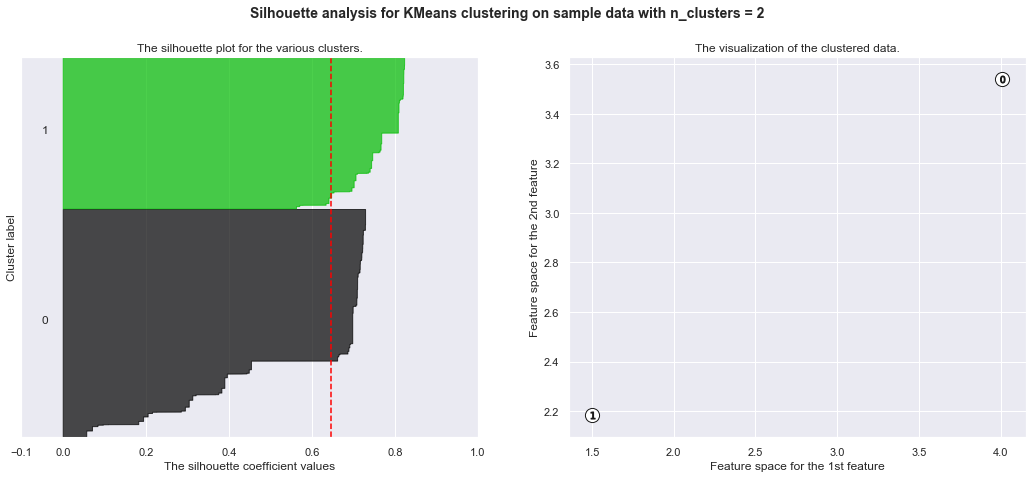

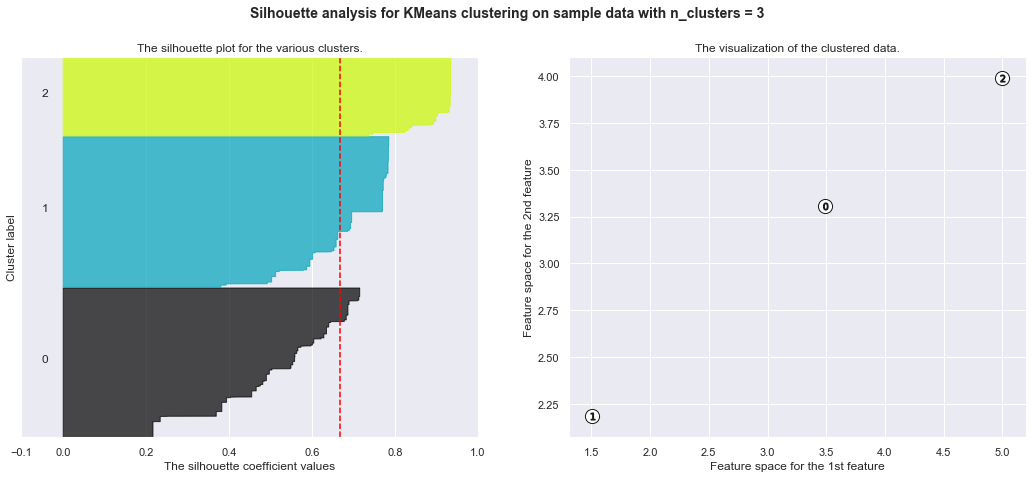

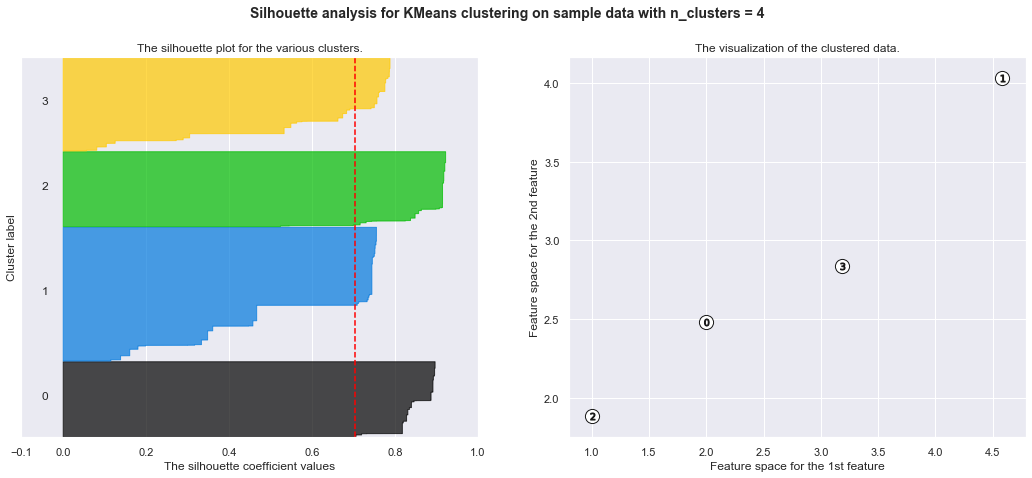

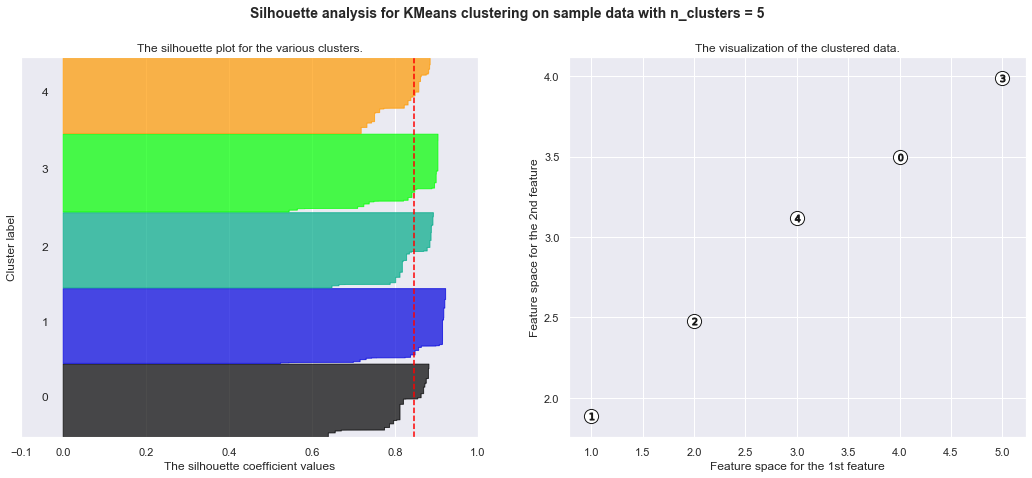

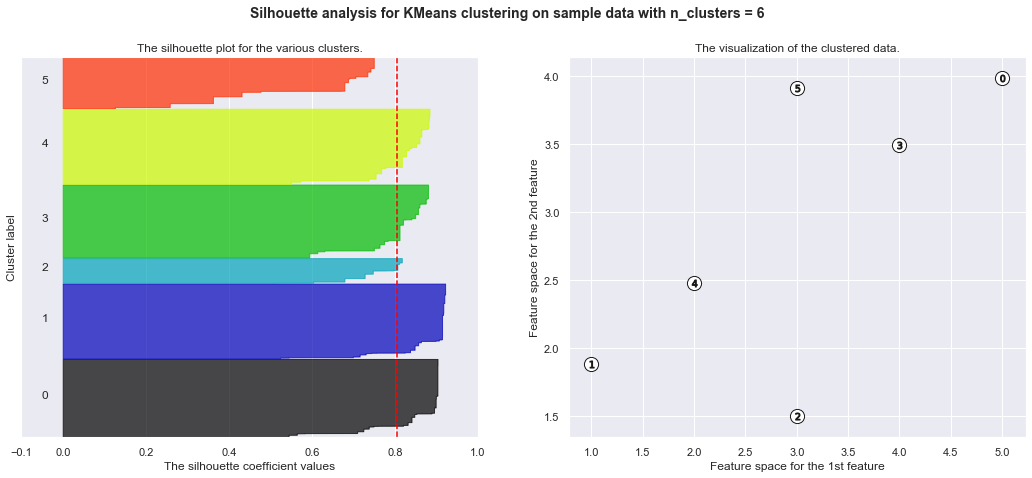

In [113]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X_test, marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In this we clearly observe choosing cluster 5 is recommended as it has the highest silhouette score.
Therefore I choose the number of clusters as 5


In [114]:
kmeans  = KMeans(n_clusters=5, random_state=0).fit(rfm[['recency_score',
                                                          'frequency_score','monetary_score','RFM_SCORE']])

In [115]:
idx = np.argsort(kmeans.cluster_centers_.sum(axis=1)) #sorting the cluster so after each run it's the same cluster.

In [116]:
idx # its in ascending order clsuter 1 being the least import to clsuter 2 being the most important wrt customers 

array([1, 4, 0, 3, 2], dtype=int64)

In [117]:
rfm['labels'] = kmeans.labels_

In [118]:
rfm.columns

Index(['Customer ID', 'recency', 'frequency', 'monetary', 'recency_score',
       'monetary_score', 'frequency_score', 'RFM_SCORE', 'labels'],
      dtype='object')

### Plotting graphs wrt clusters

In [119]:
color=['red','blue','green','purple','orange'] #for plotting

3.0    1.0
Name: recency_score, dtype: float64
4.0    0.266949
3.0    0.226271
2.0    0.189831
5.0    0.177966
1.0    0.138983
Name: monetary_score, dtype: float64
4.0    0.272881
3.0    0.227966
5.0    0.170339
2.0    0.164407
1.0    0.164407
Name: frequency_score, dtype: float64
344.0    0.139831
355.0    0.113559
333.0    0.090678
311.0    0.080508
343.0    0.061864
334.0    0.059322
322.0    0.058475
312.0    0.057627
332.0    0.051695
345.0    0.048305
354.0    0.045763
323.0    0.045763
321.0    0.042373
342.0    0.021186
313.0    0.018644
324.0    0.016102
331.0    0.013559
335.0    0.012712
353.0    0.009322
314.0    0.005932
315.0    0.001695
341.0    0.001695
325.0    0.001695
352.0    0.000847
351.0    0.000847
Name: RFM_SCORE, dtype: float64


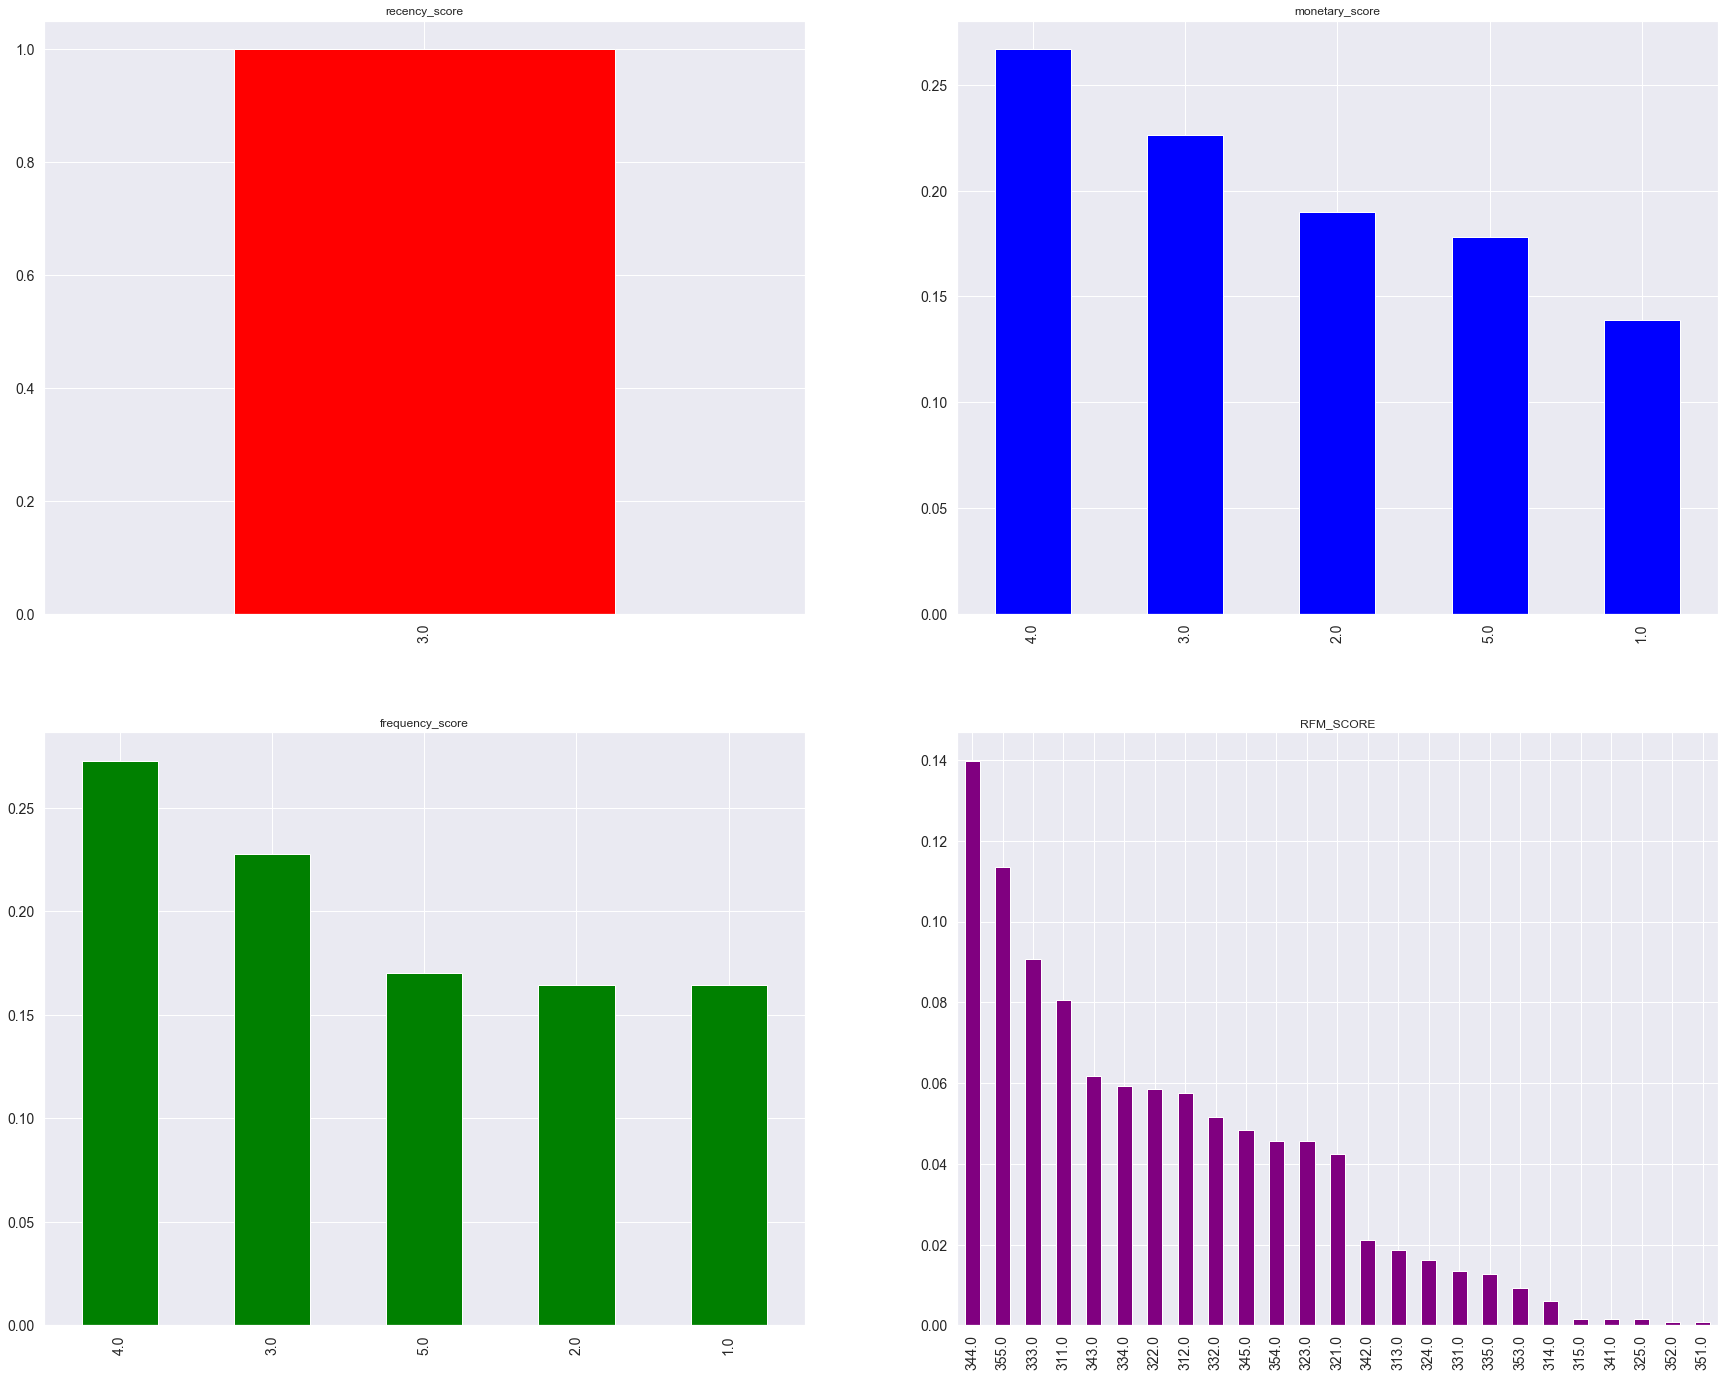

In [120]:
#for cluster 0
fig, axes = plt.subplots(2,2, figsize=(30, 24))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(rfm.columns[4:8]):
    print(rfm[rfm['labels']==0][c].value_counts(normalize=True))
    rfm[rfm['labels']==0][c].value_counts(normalize=True).plot(kind='bar',ax=axes[i],title=c, fontsize=14,color=color[i])

1.0    1.0
Name: recency_score, dtype: float64
1.0    0.436644
2.0    0.287671
3.0    0.157534
4.0    0.085616
5.0    0.032534
Name: monetary_score, dtype: float64
1.0    0.437500
2.0    0.330479
3.0    0.156678
4.0    0.061644
5.0    0.013699
Name: frequency_score, dtype: float64
111.0    0.270548
121.0    0.146404
112.0    0.129281
122.0    0.113870
133.0    0.059932
123.0    0.050514
132.0    0.040240
134.0    0.032534
113.0    0.028253
144.0    0.028253
131.0    0.017979
143.0    0.017979
124.0    0.014555
145.0    0.009418
155.0    0.008562
135.0    0.005993
114.0    0.005993
125.0    0.005137
154.0    0.004281
142.0    0.004281
115.0    0.003425
141.0    0.001712
153.0    0.000856
Name: RFM_SCORE, dtype: float64


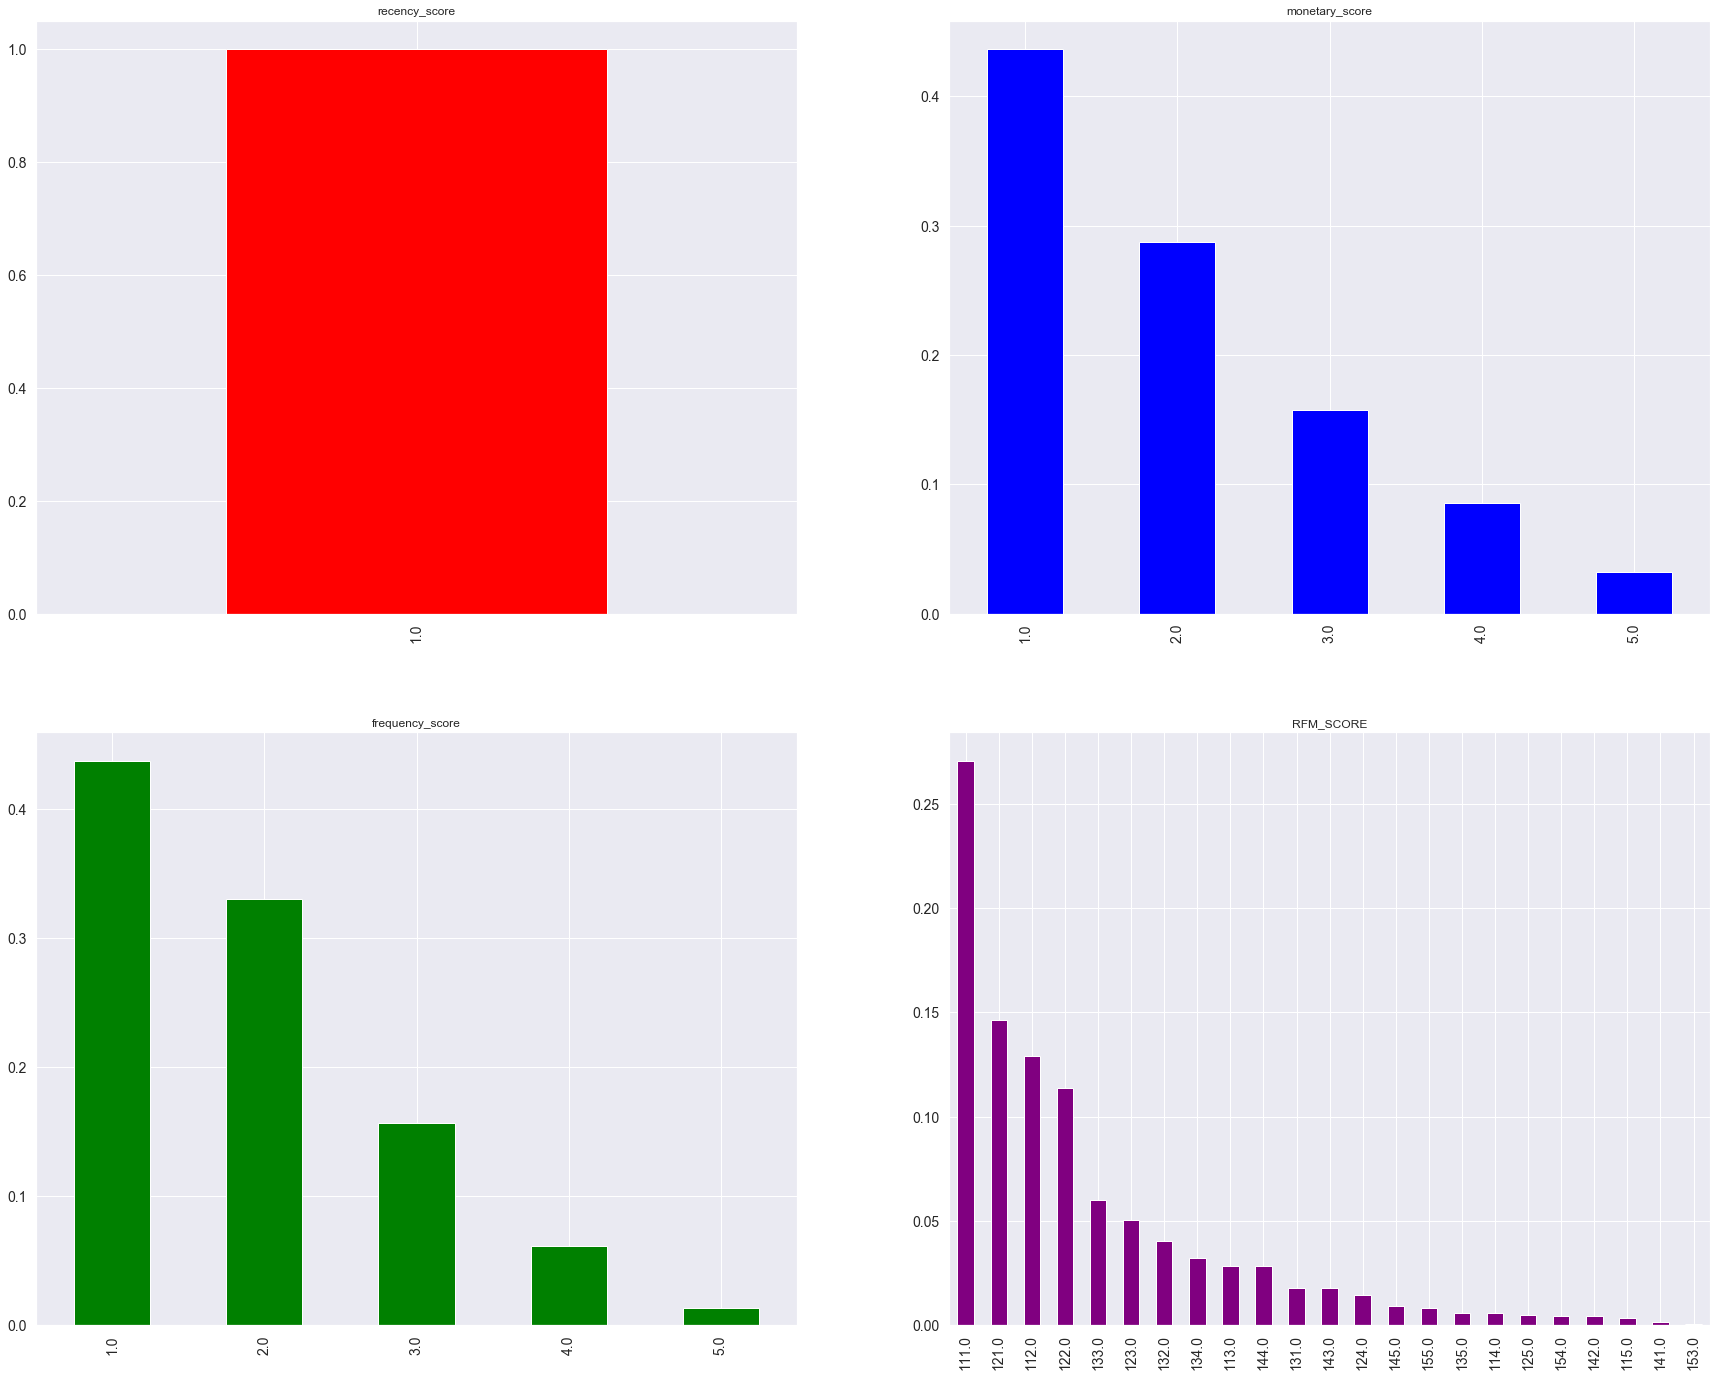

In [121]:
# For cluster 1
fig, axes = plt.subplots(2,2, figsize=(30, 24))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(rfm.columns[4:8]):
    print(rfm[rfm['labels']==1][c].value_counts(normalize=True))
    rfm[rfm['labels']==1][c].value_counts(normalize=True).plot(kind='bar',ax=axes[i],title=c, fontsize=14,color=color[i])

5.0    1.0
Name: recency_score, dtype: float64
5.0    0.437037
4.0    0.237860
3.0    0.169547
2.0    0.097942
1.0    0.057613
Name: monetary_score, dtype: float64
5.0    0.476543
4.0    0.224691
3.0    0.158848
2.0    0.093827
1.0    0.046091
Name: frequency_score, dtype: float64
555.0    0.389300
544.0    0.110288
554.0    0.082305
543.0    0.068313
533.0    0.067490
545.0    0.037860
534.0    0.037037
532.0    0.036214
522.0    0.033745
523.0    0.027160
511.0    0.023868
521.0    0.023045
512.0    0.018930
531.0    0.010700
542.0    0.008230
524.0    0.008230
535.0    0.007407
553.0    0.004115
513.0    0.002469
525.0    0.001646
515.0    0.000823
552.0    0.000823
Name: RFM_SCORE, dtype: float64


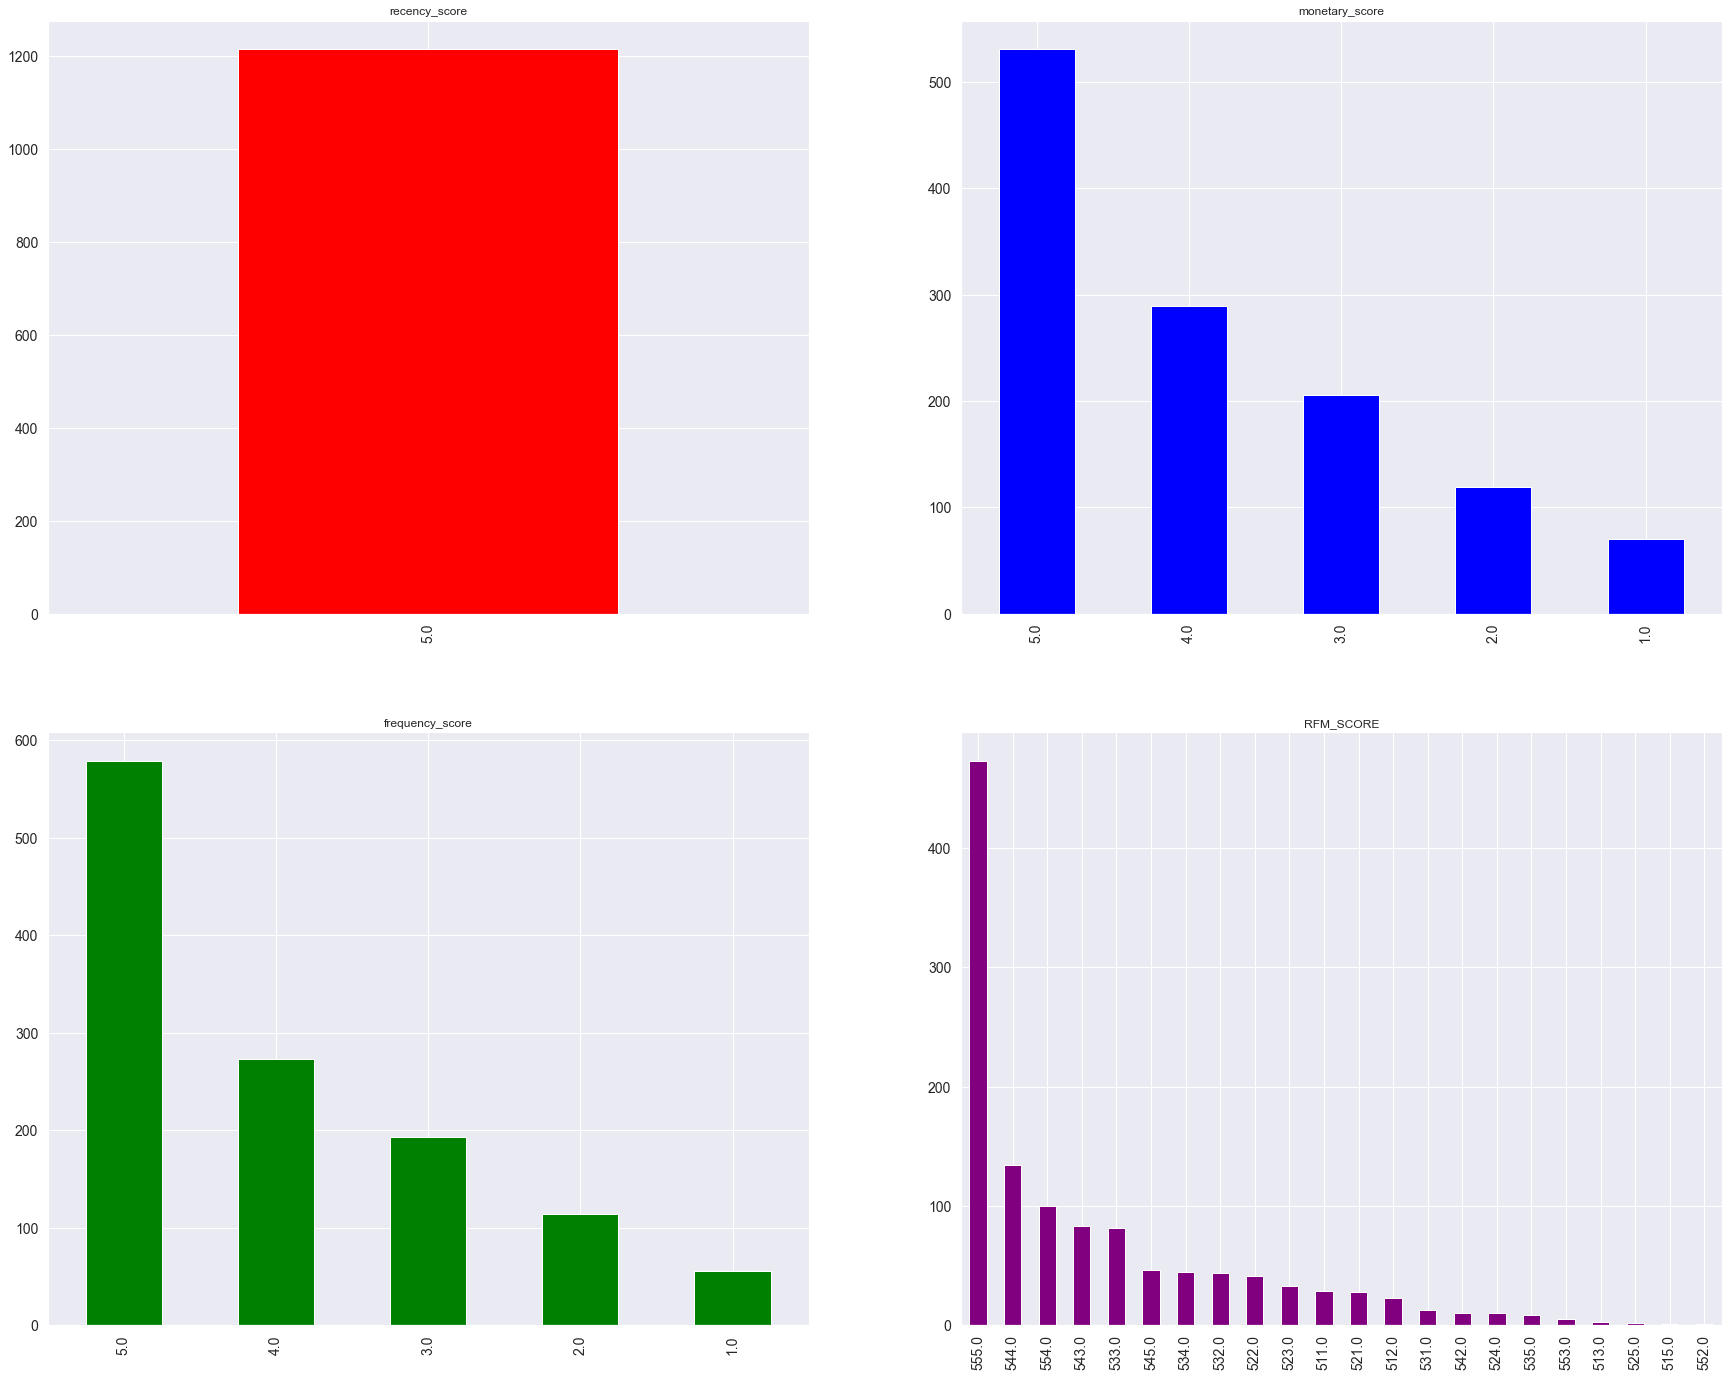

In [122]:
# For cluster 2
fig, axes = plt.subplots(2,2, figsize=(30, 24))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(rfm.columns[4:8]):
    print(rfm[rfm['labels']==2][c].value_counts(normalize=True))
    rfm[rfm['labels']==2][c].value_counts().plot(kind='bar',ax=axes[i],title=c, fontsize=14,color=color[i])

4.0    1.0
Name: recency_score, dtype: float64
5.0    0.285088
4.0    0.251754
3.0    0.211404
2.0    0.139474
1.0    0.112281
Name: monetary_score, dtype: float64
5.0    0.285088
4.0    0.262281
3.0    0.214912
2.0    0.141228
1.0    0.096491
Name: frequency_score, dtype: float64
455.0    0.211404
444.0    0.125439
433.0    0.088596
454.0    0.071053
445.0    0.064035
443.0    0.063158
411.0    0.057895
432.0    0.056140
422.0    0.049123
423.0    0.045614
434.0    0.044737
421.0    0.035965
412.0    0.026316
431.0    0.016667
413.0    0.011404
424.0    0.009649
435.0    0.008772
442.0    0.007895
453.0    0.002632
441.0    0.001754
414.0    0.000877
425.0    0.000877
Name: RFM_SCORE, dtype: float64


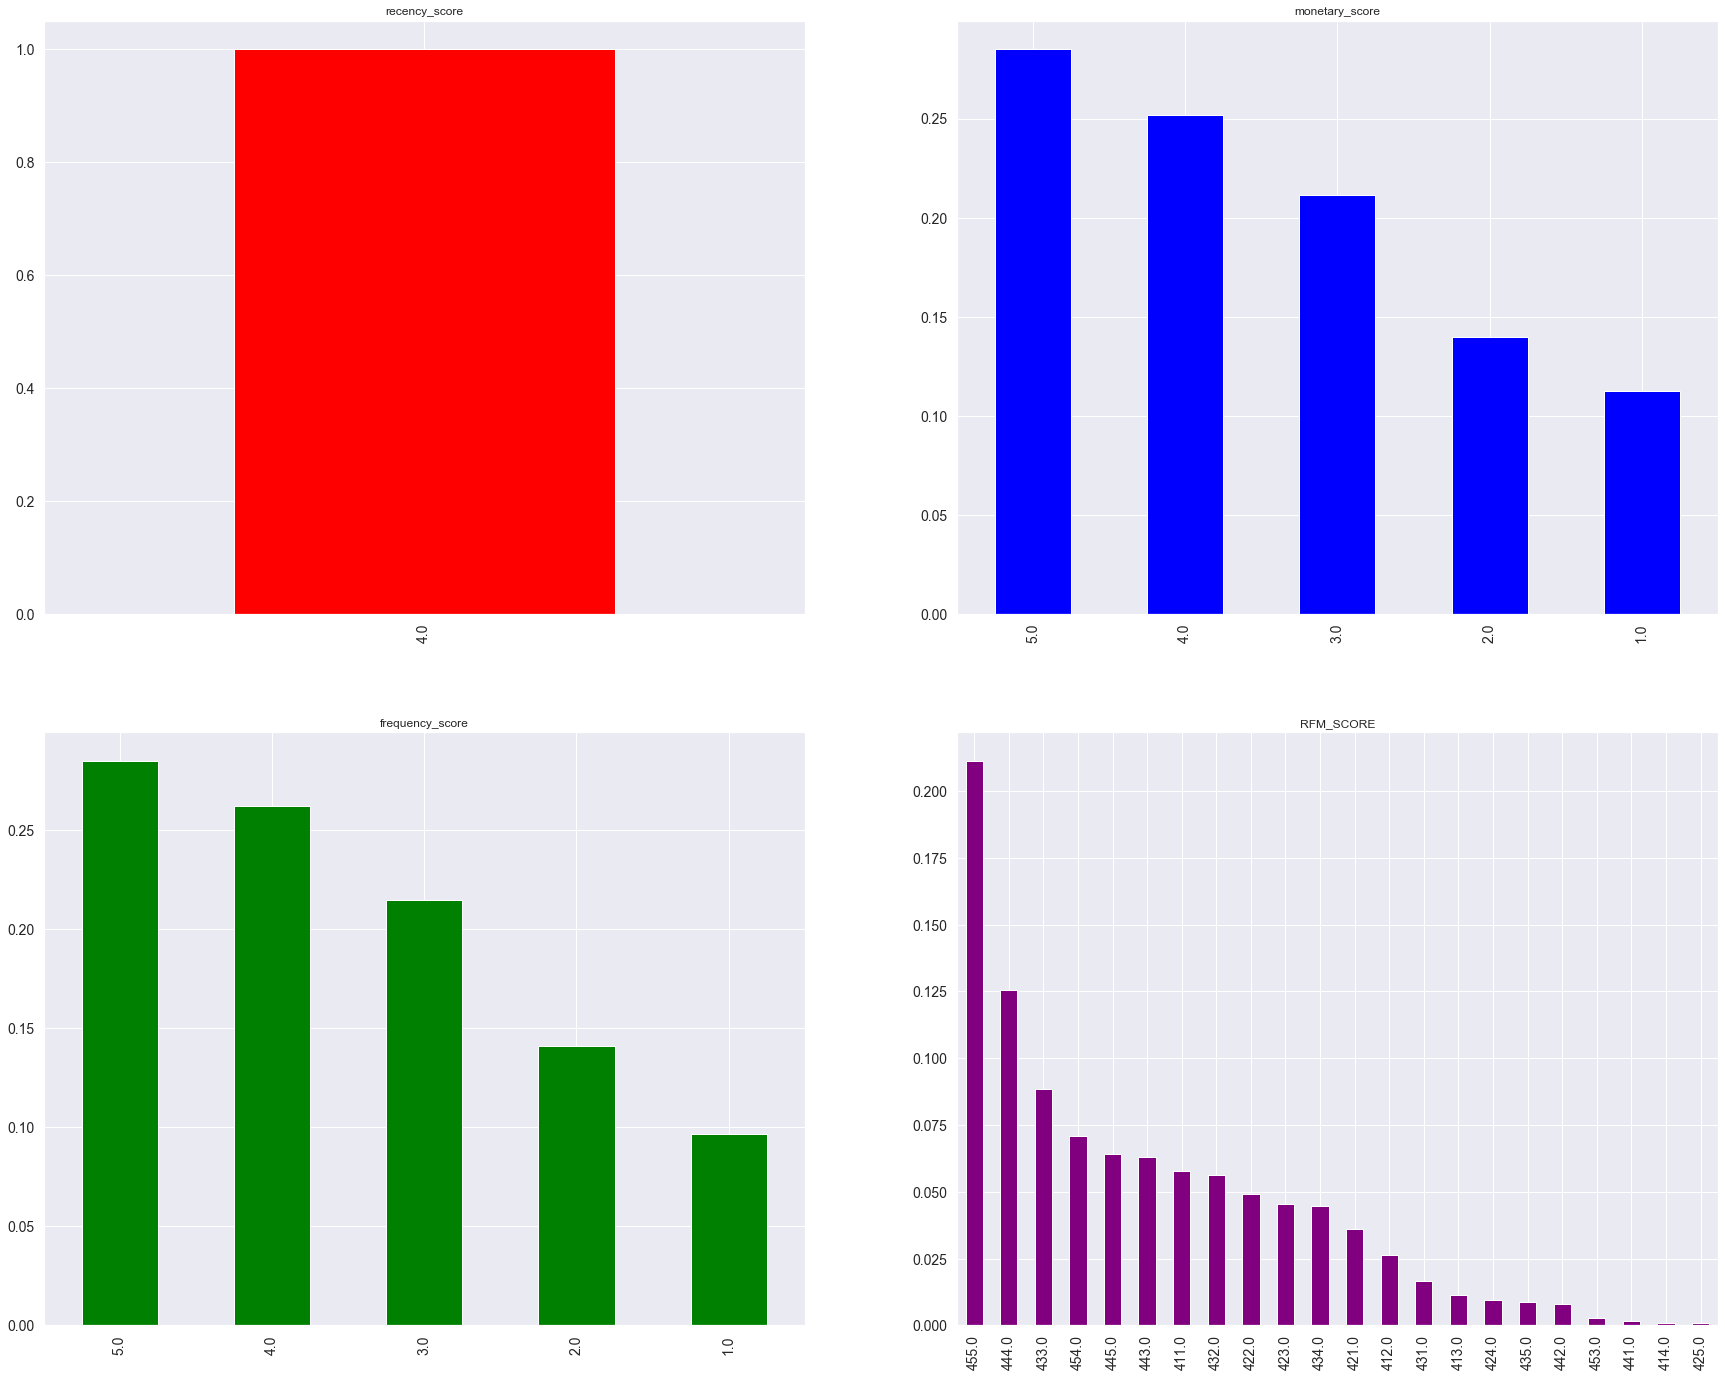

In [123]:
# For cluster 3
fig, axes = plt.subplots(2,2, figsize=(30, 24))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(rfm.columns[4:8]):
    print(rfm[rfm['labels']==3][c].value_counts(normalize=True))
    rfm[rfm['labels']==3][c].value_counts(normalize=True).plot(kind='bar',ax=axes[i],title=c, fontsize=14,color=color[i])

2.0    1.0
Name: recency_score, dtype: float64
2.0    0.286809
1.0    0.258723
3.0    0.236596
4.0    0.156596
5.0    0.061277
Name: monetary_score, dtype: float64
2.0    0.272340
1.0    0.259574
3.0    0.243404
4.0    0.177872
5.0    0.046809
Name: frequency_score, dtype: float64
211.0    0.141277
221.0    0.104681
222.0    0.102128
233.0    0.092766
232.0    0.085957
212.0    0.084255
244.0    0.071489
243.0    0.067234
223.0    0.050213
234.0    0.046809
255.0    0.028936
213.0    0.024681
245.0    0.022979
254.0    0.016170
242.0    0.014468
224.0    0.012766
231.0    0.011064
214.0    0.009362
235.0    0.006809
225.0    0.002553
253.0    0.001702
241.0    0.001702
Name: RFM_SCORE, dtype: float64


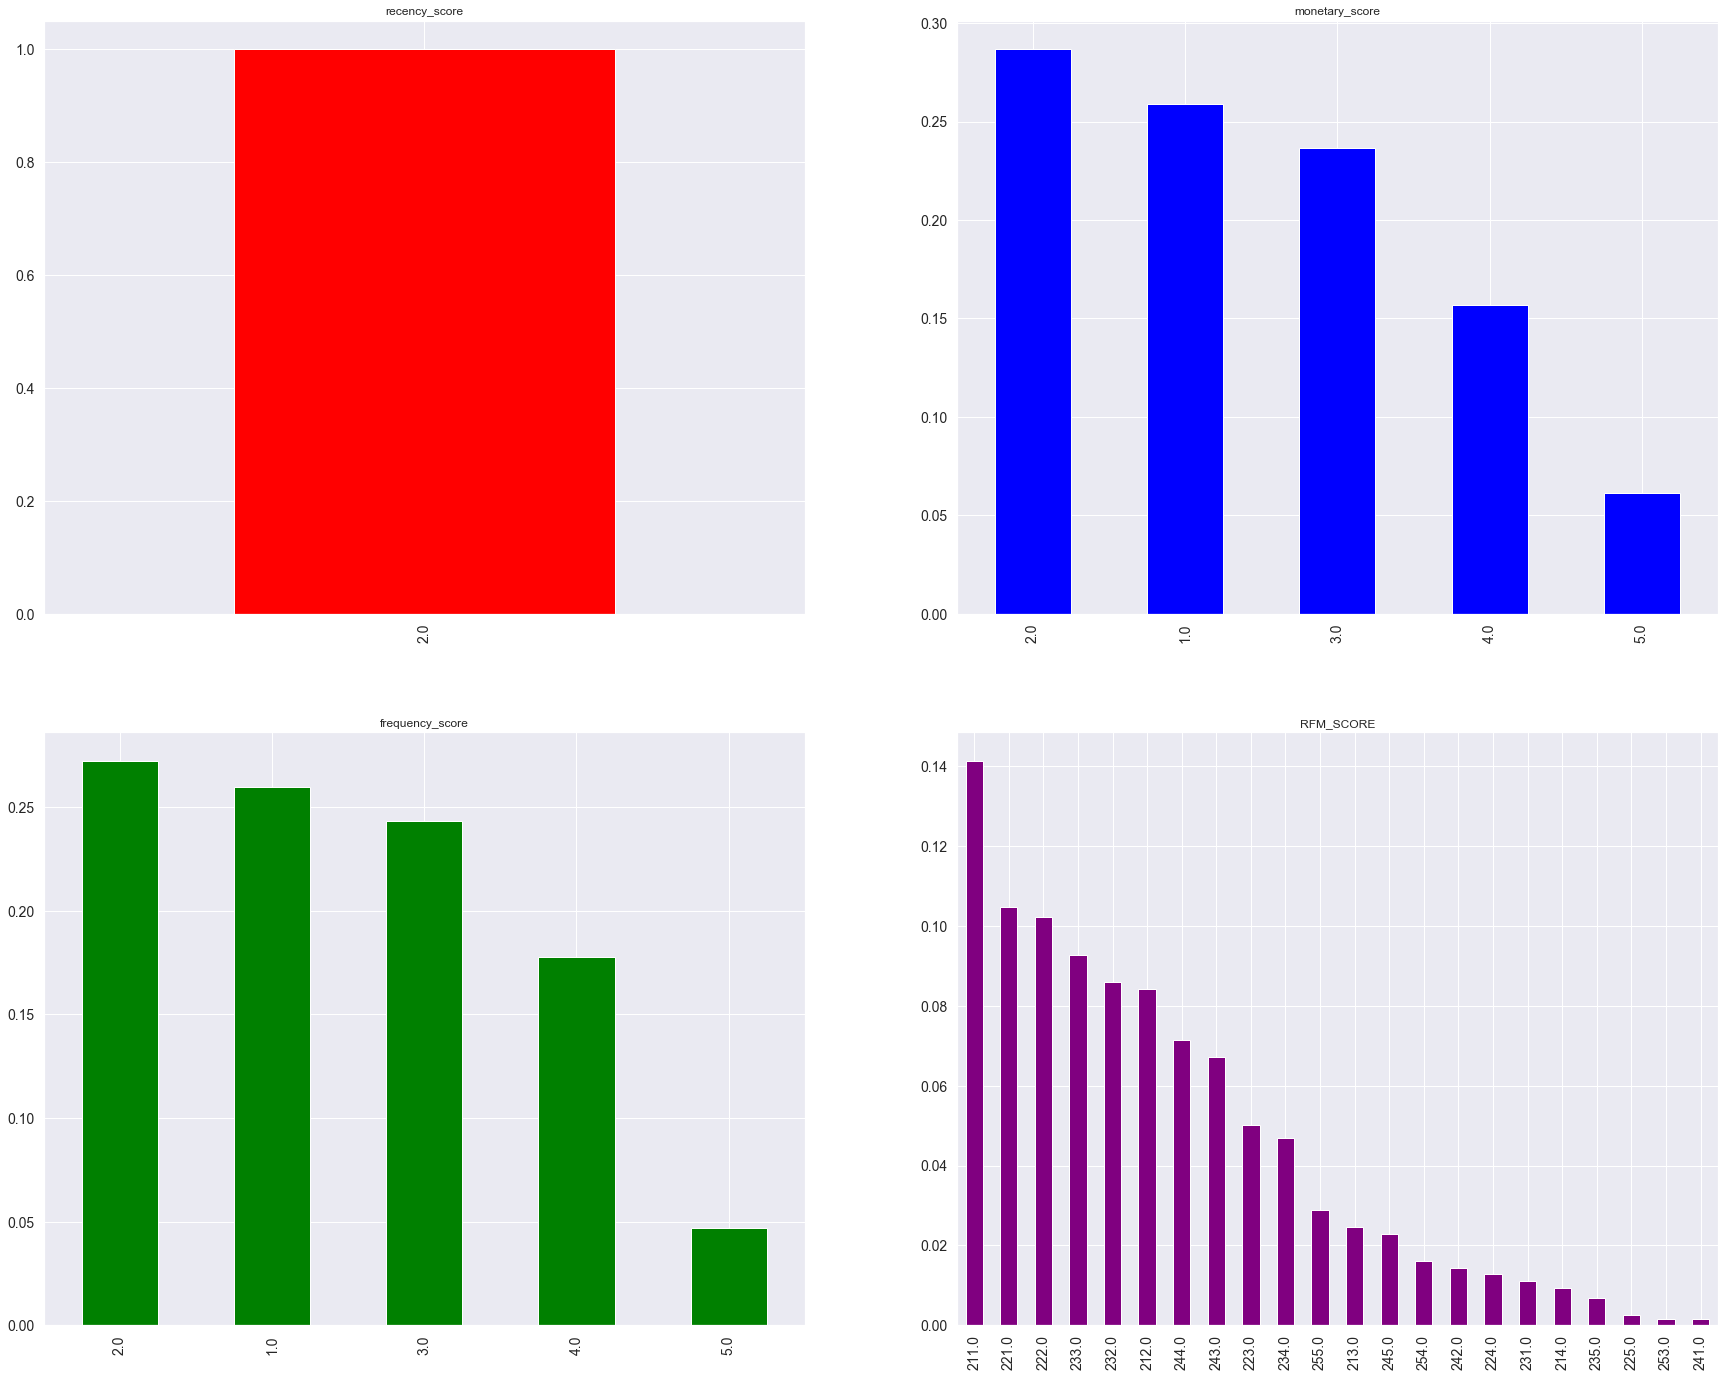

In [124]:
# For cluster 4
fig, axes = plt.subplots(2,2, figsize=(30, 24))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(rfm.columns[4:8]):
    print(rfm[rfm['labels']==4][c].value_counts(normalize=True))
    rfm[rfm['labels']==4][c].value_counts(normalize=True).plot(kind='bar',ax=axes[i],title=c, fontsize=14,color=color[i])

### Plotting graphs with respect to columns

In [125]:
title=['cluster 0','cluster 1','cluster 2','cluster 3','cluster 4']

3.0    1180
Name: recency_score, dtype: int64
1.0    1168
Name: recency_score, dtype: int64
5.0    1215
Name: recency_score, dtype: int64
4.0    1140
Name: recency_score, dtype: int64
2.0    1175
Name: recency_score, dtype: int64


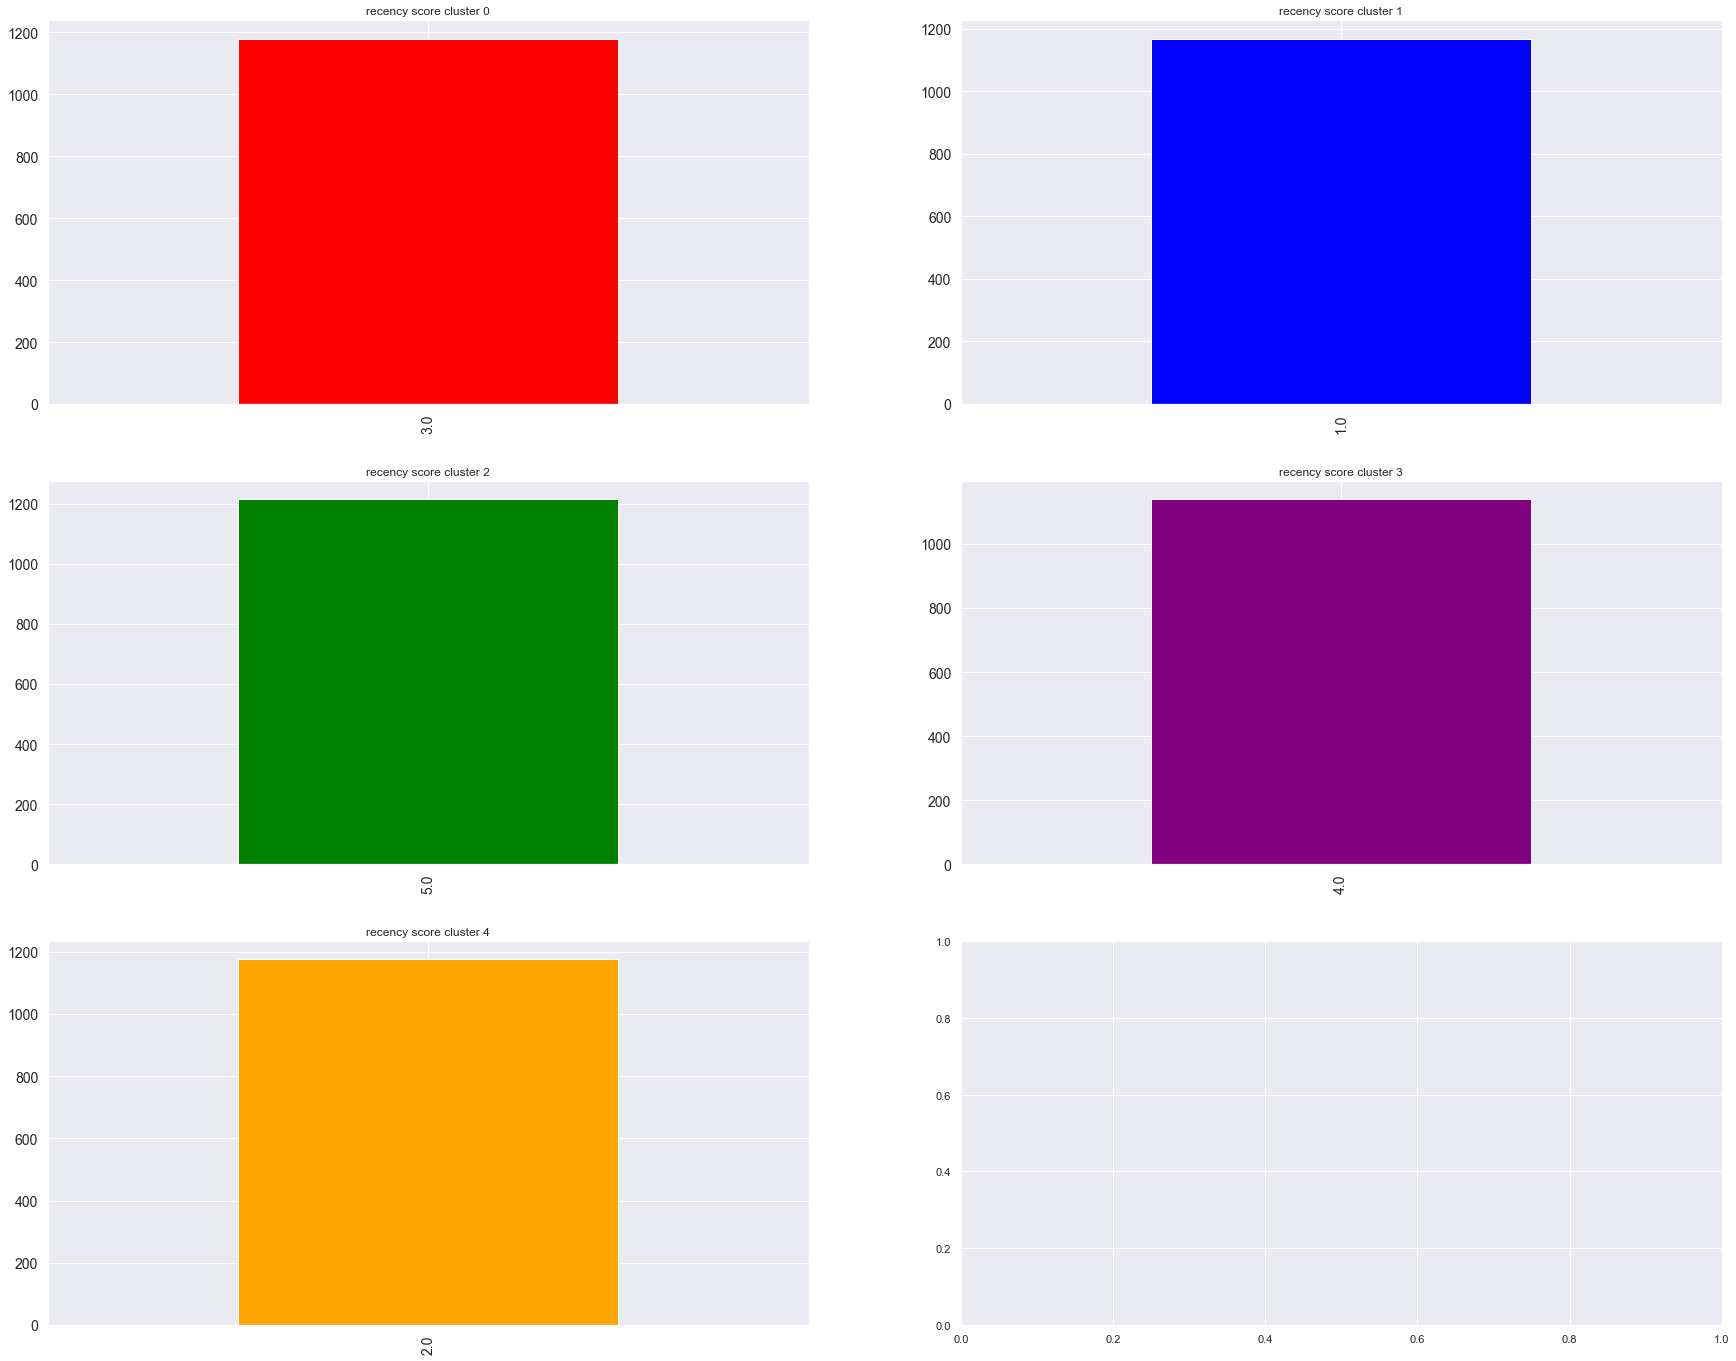

In [126]:
# For recency_score
fig, axes = plt.subplots(3,2, figsize=(30, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i,j,t in zip(range(0,5),color,title):
    print(rfm[rfm['labels']==i]['recency_score'].value_counts())
    rfm[rfm['labels']==i]['recency_score'].value_counts().plot(kind='bar',ax=axes[i],title="recency score" +" "+t,fontsize=14,color=j)
    

4.0    0.272881
3.0    0.227966
5.0    0.170339
2.0    0.164407
1.0    0.164407
Name: frequency_score, dtype: float64
1.0    0.437500
2.0    0.330479
3.0    0.156678
4.0    0.061644
5.0    0.013699
Name: frequency_score, dtype: float64
5.0    0.476543
4.0    0.224691
3.0    0.158848
2.0    0.093827
1.0    0.046091
Name: frequency_score, dtype: float64
5.0    0.285088
4.0    0.262281
3.0    0.214912
2.0    0.141228
1.0    0.096491
Name: frequency_score, dtype: float64
2.0    0.272340
1.0    0.259574
3.0    0.243404
4.0    0.177872
5.0    0.046809
Name: frequency_score, dtype: float64


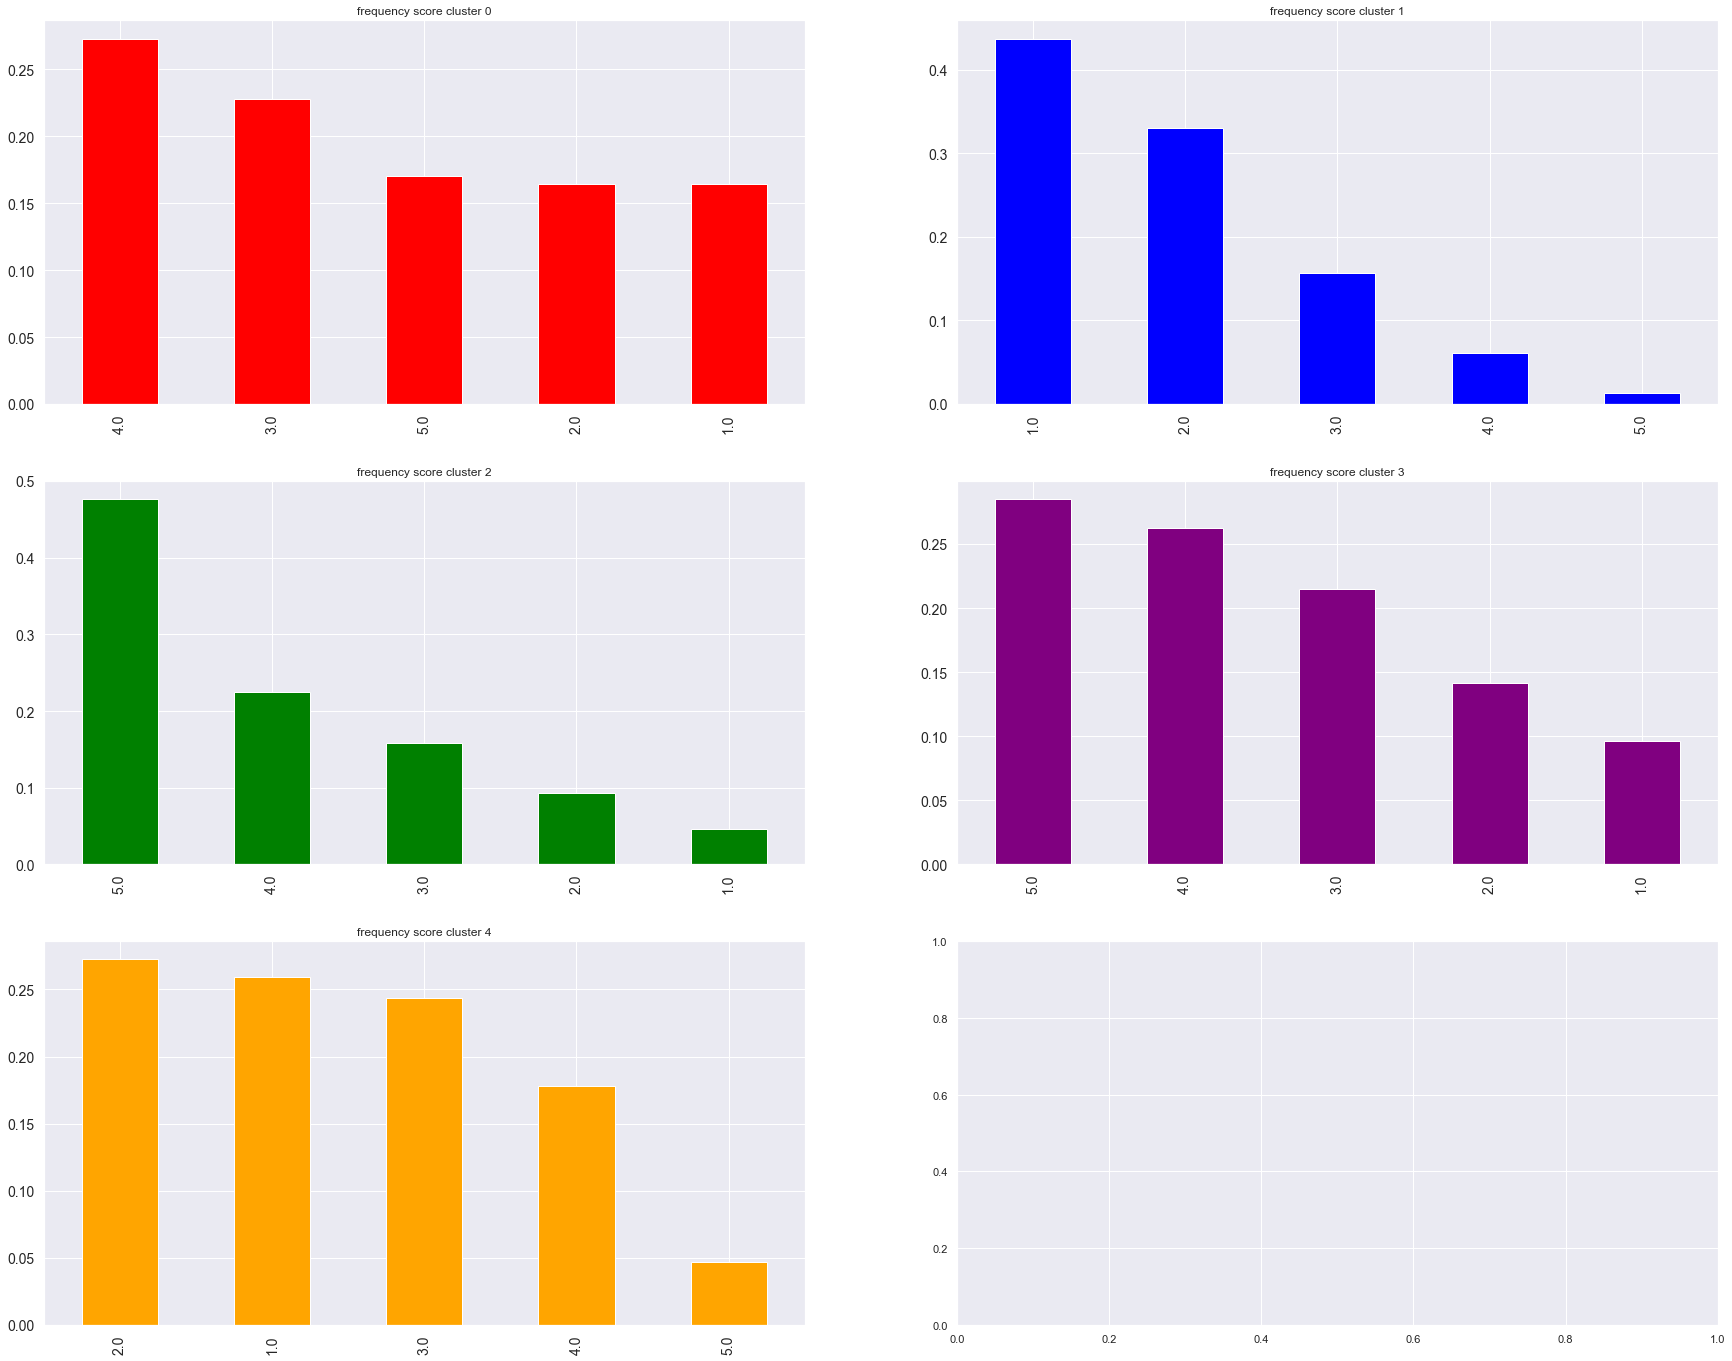

In [127]:
# For frequency_score
fig, axes = plt.subplots(3,2, figsize=(30, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i,j,t in zip(range(0,5),color,title):
    print(rfm[rfm['labels']==i]['frequency_score'].value_counts(normalize=True))
    rfm[rfm['labels']==i]['frequency_score'].value_counts(normalize=True).plot(kind='bar',ax=axes[i],title="frequency score" +" "+t, fontsize=14,color=j)

4.0    0.266949
3.0    0.226271
2.0    0.189831
5.0    0.177966
1.0    0.138983
Name: monetary_score, dtype: float64
1.0    0.436644
2.0    0.287671
3.0    0.157534
4.0    0.085616
5.0    0.032534
Name: monetary_score, dtype: float64
5.0    0.437037
4.0    0.237860
3.0    0.169547
2.0    0.097942
1.0    0.057613
Name: monetary_score, dtype: float64
5.0    0.285088
4.0    0.251754
3.0    0.211404
2.0    0.139474
1.0    0.112281
Name: monetary_score, dtype: float64
2.0    0.286809
1.0    0.258723
3.0    0.236596
4.0    0.156596
5.0    0.061277
Name: monetary_score, dtype: float64


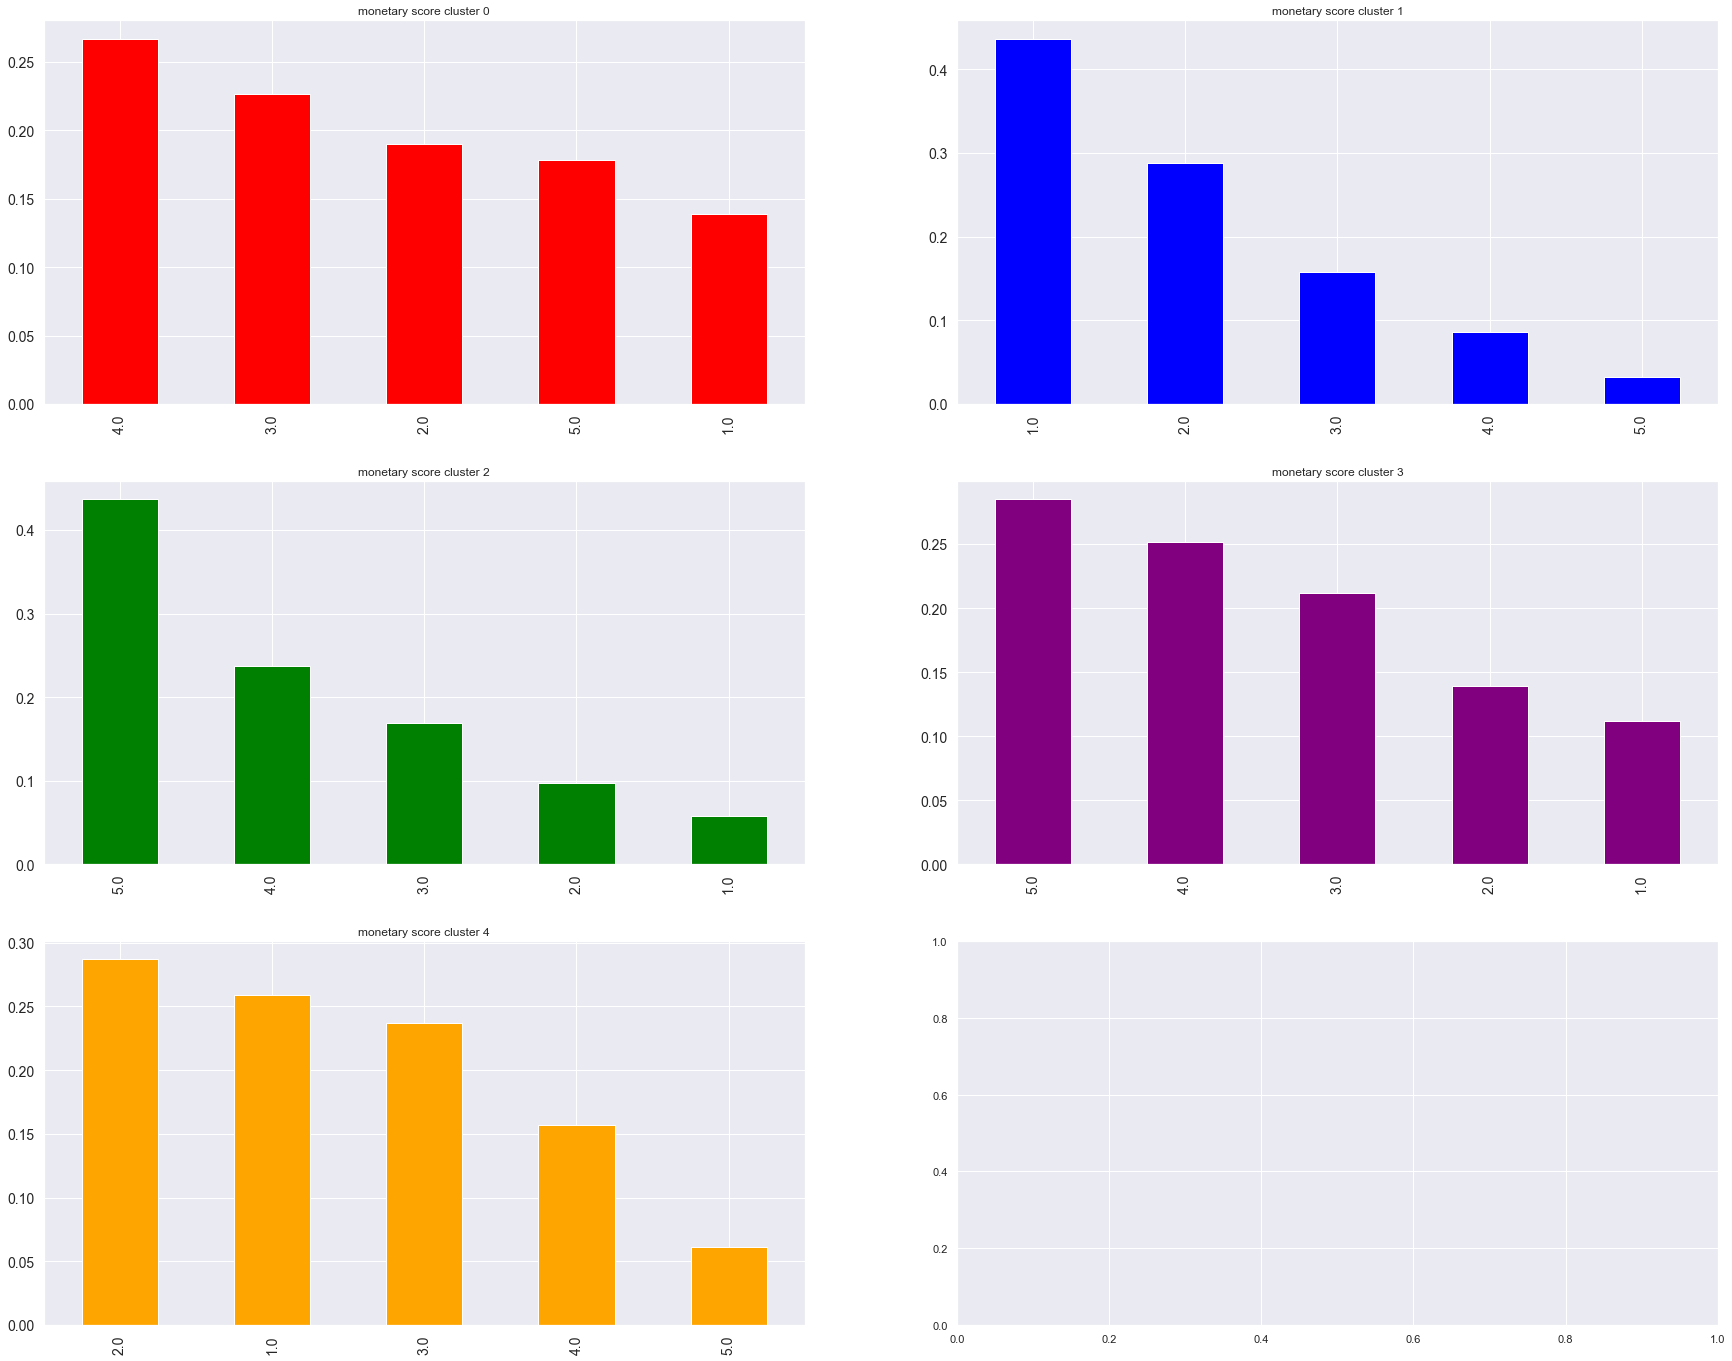

In [128]:
# For monetary_score
fig, axes = plt.subplots(3,2, figsize=(30, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i,j,t in zip(range(0,5),color,title):
    print(rfm[rfm['labels']==i]['monetary_score'].value_counts(normalize=True))
    rfm[rfm['labels']==i]['monetary_score'].value_counts(normalize=True).plot(kind='bar',ax=axes[i],title="monetary score" +" "+t, fontsize=14,color=j)

344.0    0.139831
355.0    0.113559
333.0    0.090678
311.0    0.080508
343.0    0.061864
334.0    0.059322
322.0    0.058475
312.0    0.057627
332.0    0.051695
345.0    0.048305
354.0    0.045763
323.0    0.045763
321.0    0.042373
342.0    0.021186
313.0    0.018644
324.0    0.016102
331.0    0.013559
335.0    0.012712
353.0    0.009322
314.0    0.005932
315.0    0.001695
341.0    0.001695
325.0    0.001695
352.0    0.000847
351.0    0.000847
Name: RFM_SCORE, dtype: float64
111.0    0.270548
121.0    0.146404
112.0    0.129281
122.0    0.113870
133.0    0.059932
123.0    0.050514
132.0    0.040240
134.0    0.032534
113.0    0.028253
144.0    0.028253
131.0    0.017979
143.0    0.017979
124.0    0.014555
145.0    0.009418
155.0    0.008562
135.0    0.005993
114.0    0.005993
125.0    0.005137
154.0    0.004281
142.0    0.004281
115.0    0.003425
141.0    0.001712
153.0    0.000856
Name: RFM_SCORE, dtype: float64
555.0    0.389300
544.0    0.110288
554.0    0.082305
543.0    0.068313


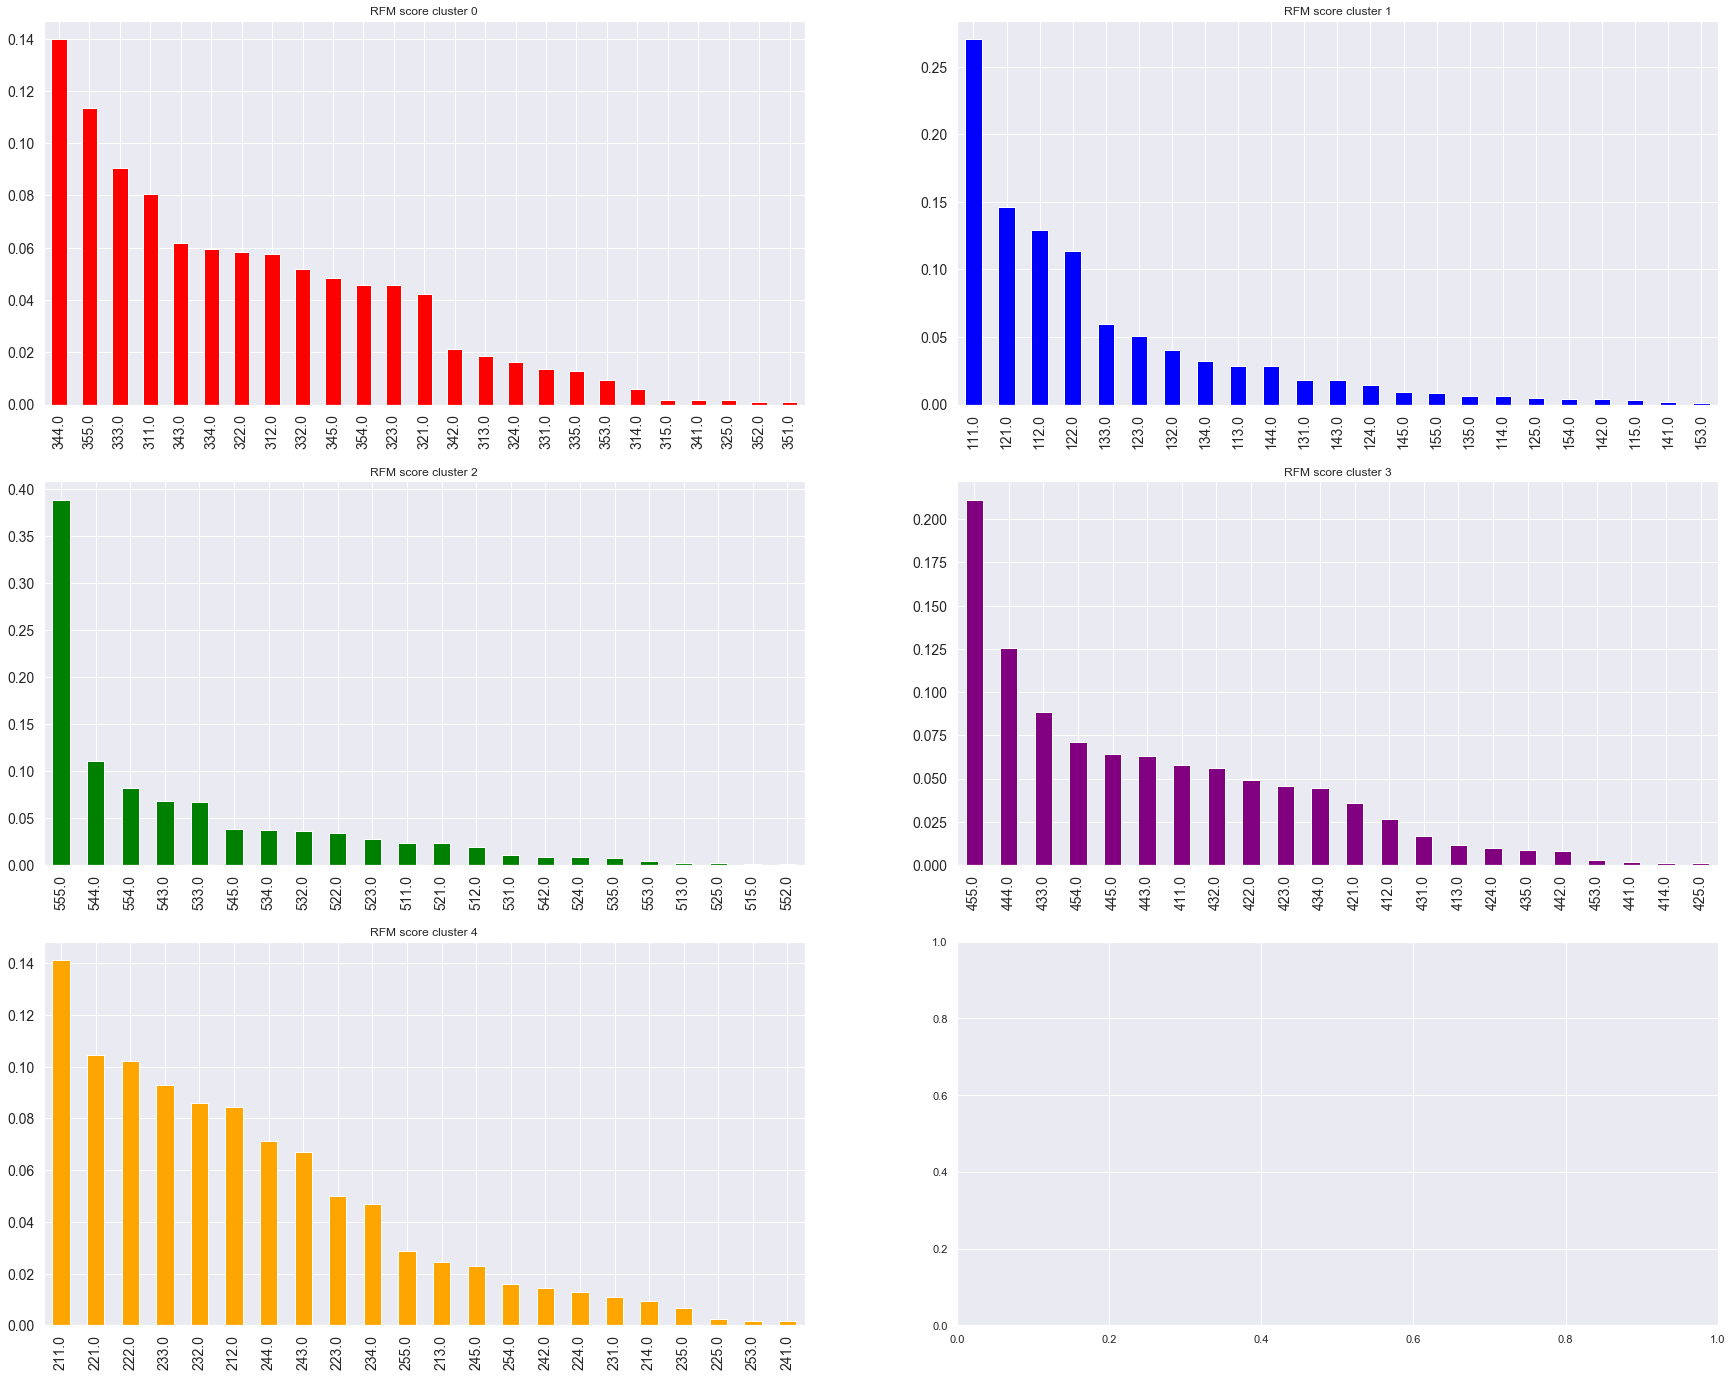

In [129]:
# For RFM_SCORE
fig, axes = plt.subplots(3,2, figsize=(30, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i,j,t in zip(range(0,5),color,title):
    print(rfm[rfm['labels']==i]['RFM_SCORE'].value_counts(normalize=True))
    rfm[rfm['labels']==i]['RFM_SCORE'].value_counts(normalize=True).plot(kind='bar',ax=axes[i],title="RFM score" +" "+t, fontsize=14,color=j)

### Observation:

From the above graphs, it’s clear that clustering is highly correlated with recency scores. It can be observed that customers who have high recency score have high frequency and monetary score too. Indicating active customers tends to spend more.

Let’s try to understand using two clusters cluster 2 and cluster 1 which according to the above analysis is the most important and least important clusters respectively. 

Now if you see the top five RFM score of cluster 2 which are:
555,544,554,543,533,545 in this the first digit represent recency score, the second digit represent frequency score and the third digit represent the monetary score. As it can be observed all the three scores are pretty high indicating “Most valuable customers”. In this cluster, it is interesting to note that more than 35% of data have a high RFM score of 555.

Similarly, the top five RFM scores of cluster 1 are:
111,121,112,122,133. It can be observed all the three scores are pretty less as compared to cluster 2 indicating “Churned customers”. In this cluster, more than 25% of data have the lowest RFM score of 111.


According to graphs I have classified these clusters as:

Cluster 0: “Promising customers”

Cluster 1: “Churned customers”

Cluster 2: “Most valuable customers”

Cluster 3: “Potential valuable customers”

Cluster 4: “About to churn customers”


In [130]:
def seg(row):
    if row['labels']==0.0:
        val="Promising customers"
    elif row['labels']==1.0:
        val="Churned customers"
    elif row['labels']==2.0:
        val="Most valuable customers"
    elif row['labels']==3.0:
        val="Potential valuable customers"
    else:
        val="About to churn customers"
    return val

In [131]:
rfm['segment']=rfm.apply(seg,axis=1) 

In [132]:
rfm

Customer ID  recency  frequency  monetary  recency_score  \
0         12346.0    325.0       12.0  77556.46            2.0   
1         12347.0      2.0        8.0   4921.53            5.0   
2         12348.0     75.0        5.0   2019.40            3.0   
3         12349.0     18.0        4.0   4428.69            5.0   
4         12350.0    310.0        1.0    334.40            2.0   
...           ...      ...        ...       ...            ...   
5873      18283.0      3.0       22.0   2664.90            5.0   
5874      18284.0    431.0        1.0    461.68            1.0   
5875      18285.0    660.0        1.0    427.00            1.0   
5876      18286.0    476.0        2.0   1296.43            1.0   
5877      18287.0     42.0        7.0   4182.99            4.0   

      monetary_score  frequency_score  RFM_SCORE  labels  \
0                5.0              5.0      255.0       4   
1                5.0              4.0      545.0       2   
2                4.0              4.0      344.0       0   
3                5.0              3.0      535.0       2   
4                2.0              1.0      212.0       4   
...              ...              ...        ...     ...   
5873             4.0              5.0      554.0       2   
5874             2.0              2.0      122.0       1   
5875             2.0              2.0      122.0       1   
5876             4.0              3.0      134.0       1   
5877             5.0              4.0      445.0       3   

                           segment  
0         About to churn customers  
1          Most valuable customers  
2              Promising customers  
3          Most valuable customers  
4         About to churn customers  
...                            ...  
5873       Most valuable customers  
5874             Churned customers  
5875             Churned customers  
5876             Churned customers  
5877  Potential valuable customers  

[5878 rows x 10 columns]

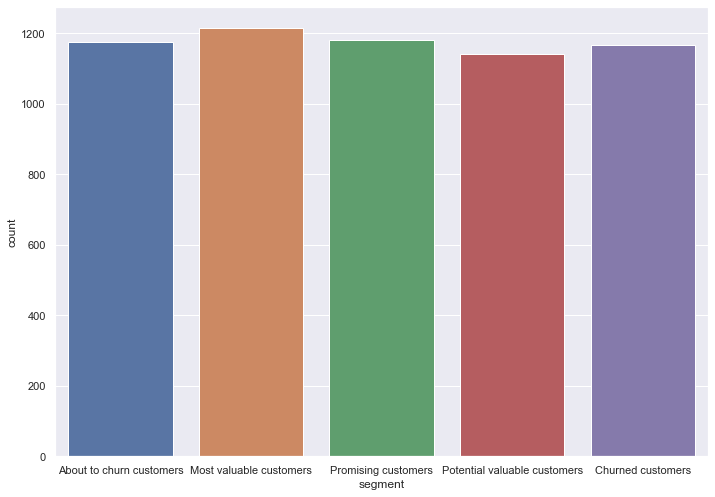

In [133]:
sns.countplot(x='segment',data=rfm)

## 5.Recommendation system based on country

Tried making a recommendation system based on country. It suggests most items bought together. I have implemented this using the apriori algorithm. 

In apriori algorithm we basically encounter support, confidence and lift.

Support: Each item’s frequency of occurrence.

Confidence: It refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by a total number of transactions where A is bought.

Lift: It refers to the increase in the ratio of sale of B when A is sold. Lift (A –> B) can be calculated by dividing Confidence (A -> B) divided by Support (B).

An antecedent is an item found within the data. A consequent is an item found in combination with the antecedent.


In [134]:
data

Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  Revenue  \
0       2009-12-01 07:45:00   6.95      13085.0  United Kingdom    83.40   
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00   
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom    81.00   
3       2009-12-01 07:45:00   2.10      13085.0  United Kingdom   100.80   
4       2009-12-01 07:45:00   1.25      13085.0  United Kingdom    30.00   
...                     ...    ...          ...             ...      ...   
1067366 2011-12-09 12:50:00   2.10      12680.0          France    12.60   
1067367 2011-12-09 12:50:00   4.15      12680.0          France    16.60   
1067368 2011-12-09 12:50:00   4.15      12680.0          France    16.60   
1067369 2011-12-09 12:50:00   4.95      12680.0          France    14.85   
1067370 2011-12-09 12:50:00  18.00      12680.0          France    18.00   

        month_year  
0          2009-12  
1          2009-12  
2          2009-12  
3          2009-12  
4          2009-12  
...            ...  
1067366    2011-12  
1067367    2011-12  
1067368    2011-12  
1067369    2011-12  
1067370    2011-12  

[779495 rows x 10 columns]

In [135]:
recom=copy.deepcopy(data)

In [136]:
recom['Description'] = recom['Description'].str.strip()

In [137]:
from mlxtend.frequent_patterns import apriori, association_rules

In [138]:
recom[recom['Country'] =="United Kingdom"]\
          .groupby(['Invoice', 'Description'])['Quantity']\
          .sum()

Invoice  Description                        
489434   15CM CHRISTMAS GLASS BALL 20 LIGHTS    12
         FANCY FONT HOME SWEET HOME DOORMAT     10
         PINK CHERRY LIGHTS                     12
         PINK DOUGHNUT TRINKET POT              24
         RECORD FRAME 7" SINGLE SIZE            48
                                                ..
581585   ZINC WILLIE WINKIE  CANDLE STICK       24
581586   DOORMAT RED RETROSPOT                  10
         LARGE CAKE STAND  HANGING STRAWBERY     8
         RED RETROSPOT ROUND CAKE TINS          24
         SET OF 3 HANGING OWLS OLLIE BEAK       24
Name: Quantity, Length: 689546, dtype: int64

In [139]:
country_top5_list

['United Kingdom', 'Germany', 'EIRE', 'France', 'Netherlands']

In [140]:
UK = (recom[recom['Country'] =="United Kingdom"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))
Germany = (recom[recom['Country'] =="Germany"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))
EIRE = (recom[recom['Country'] =="EIRE"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))
France = (recom[recom['Country'] =="France"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))
Netherlands = (recom[recom['Country'] =="Netherlands"]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

In [141]:
# One hot encoding
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
 
# Encoding the datasets 
encoded = UK.applymap(hot_encode)
UK = encoded

encoded = Germany.applymap(hot_encode)
Germany = encoded
 
encoded = EIRE.applymap(hot_encode)
EIRE = encoded
 
encoded = France.applymap(hot_encode)
France = encoded

encoded = Netherlands.applymap(hot_encode)
Netherlands = encoded

In [142]:
# For UK
frq_items = apriori(UK, min_support = 0.02, use_colnames = True)

rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules_UK = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
#------------------------------------------------------------------------------------------------
# For Germany
frq_items = apriori(Germany, min_support = 0.05, use_colnames = True)
 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules_Ger = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

#------------------------------------------------------------------------------------------------
# For EIRE
frq_items = apriori(EIRE, min_support = 0.05, use_colnames = True)
 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules_EI = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

#------------------------------------------------------------------------------------------------
# For France
frq_items = apriori(France, min_support = 0.05, use_colnames = True)
 
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules_Fr = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

#------------------------------------------------------------------------------------------------
# For Neitherlands
frq_items = apriori(Netherlands, min_support = 0.05, use_colnames = True)
 

rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules_Net = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

i. I have sorted it with respect to confidence and lift as confidence tell us how likely they are bought together i.e how likely item A and item B are bought together and lift tell us likelihood of buying item A and B together x times more than the likelihood of just buying item B.

ii. min_threshold for lift is kept as 1. Lift of greater than 1 means products A and B are more likely to be bought together. Lift of less than 1 refers to the case where two products are unlikely to be bought together.

In [143]:
# this return the consequents of the requested antecedents.
def recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    
    for i, product in sorted_rules["antecedents"].items():
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"]))

    recommendation_list = list({item for item_list in recommendation_list for item in item_list})

    return recommendation_list[:rec_count]

In [147]:
print('Enter Country:')
x = input()
print('Enter interger range between 0-4 inclusive')
y=int(input())
if x in country_top5_list:
    country=x
else:  
    print("Error try again")
    x = input()
if (y >= 5):
    print("Error try again")
    y=int(input())

Enter Country:
France
Enter interger range between 0-4 inclusive
0


In [148]:
country_data=data[data['Country']==country]
sell_prod_country_top5=pd.DataFrame(country_data.groupby('Description').sum()['Revenue'])
sell_prod_country_top5.sort_values(by=['Revenue'],inplace=True,ascending=False)
print("country:",country)
if country=="United Kingdom":
    top_5_list = [i[0] for i in [list(x)for x in rules_UK['antecedents']]][:5]
    for i,j in enumerate(top_5_list):
        top_5_dict[i]=j
    print(top_5_dict)
else:
    top_5_list=list(sell_prod_country_top5[:5].index.str.strip())
    top_5_dict={}
    for i,j in enumerate(top_5_list):
        top_5_dict[i]=j
    print(top_5_dict)   

country: France
{0: 'POSTAGE', 1: 'Manual', 2: 'RABBIT NIGHT LIGHT', 3: 'RED TOADSTOOL LED NIGHT LIGHT', 4: 'ROUND SNACK BOXES SET OF4 WOODLAND'}


In [149]:
if country=='Germany':
    print(recommender(rules_Ger,top_5_list[y],2))
elif country=='EIRE':
    print(recommender(rules_EI,top_5_list[y],2))
elif country=='France':
    print(recommender(rules_Fr,top_5_list[y],2))
elif country=='Netherlands':
    print(recommender(rules_Net,top_5_list[y],2))
elif country=='United Kingdom':
    print(recommender(rules_UK,top_5_list[y],2))
else:
    print("error")

['LUNCH BAG APPLE DESIGN', 'LUNCH BOX WITH CUTLERY RETROSPOT']


In [146]:
if country=='Germany':
    print(recommender(rules_Ger,top_5_list[y],2))
elif country=='EIRE':
    print(recommender(rules_EI,top_5_list[y],2))
elif country=='France':
    print(recommender(rules_Fr,top_5_list[y],2))
elif country=='Netherlands':
    print(recommender(rules_Net,top_5_list[y],2))
elif country=='United Kingdom':
    print(recommender(rules_UK,top_5_list[y],2))
else:
    print("error")

['LUNCH BAG APPLE DESIGN', 'LUNCH BOX WITH CUTLERY RETROSPOT']


# The End